# Ноутбук с моделью

## Импортируем необходимые пакеты

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import seaborn as sns
import datetime as dt
import pickle
import joblib

## Определение функций

In [2]:
#описание процедуры формирования границ на основе межквартильного размаха, с возможностью выбора масштаба
def outliers_borders (series, scale = 3):
    IQR = series.quantile(0.75) - series.quantile(0.25)
    borders = ((series.quantile(0.25) - (scale * IQR)), (series.quantile(0.75) + (scale * IQR)))
    return borders

In [10]:
#описание процедуры формирования границ на основе межквартильного размаха, с возможностью выбора масштаба
def outliers_borders_max (series, scale = 3):
    borders_max = series.mean() + (scale * series.std())
    return borders_max

In [4]:
#описание процедуры формирования границ на основе межквартильного размаха, с возможностью выбора масштаба
def outliers_borders_min (series, scale = 1.5):
    IQR = series.quantile(0.75) - series.quantile(0.25)
    borders_min = series.quantile(0.25) - (scale * IQR)
    return borders_min

In [2]:
def model (string_path):
    if len(string_path.split('/')) > 2: 
        if (string_path.find('/cars/') != -1) and (string_path.find('/all/') == -1):
            num_position = string_path.find('/cars/') + len('/cars/')
            new_string = string_path[num_position:len(string_path)]
            if new_string.find('/') != -1:
                new_string = new_string[0:new_string.find('/')]
                if new_string.find('?') != -1:
                    new_string = new_string[0:new_string.find('?')]
                    if (new_string != '') and not any(x.isdigit() for x in new_string):
                        model_name = new_string
                    else:
                        model_name = np.nan
                else:
                    if (new_string != '') and not any(x.isdigit() for x in new_string):
                        model_name = new_string
                    else:
                        model_name = np.nan
            else:
                if new_string.find('?') != -1:
                    new_string = new_string[:new_string.find('?')]
                    if (new_string != '') and not any(x.isdigit() for x in new_string):
                        model_name = new_string
                    else:
                        model_name = np.nan
                else:
                    if (new_string != '') and not any(x.isdigit() for x in new_string):
                        model_name = new_string
                    else:
                        model_name = np.nan
        elif (string_path.find('/cars/') != -1) and (string_path.find('/all/') != -1):
            num_position = string_path.find('/all/') + len('/all/')
            new_string = string_path[num_position:len(string_path)]
            if new_string.find('/') != -1:
                new_string = new_string[:new_string.find('/')]
                if new_string.find('?') != -1:
                    new_string = new_string[:new_string.find('?')]
                    if (new_string != '') and not any(x.isdigit() for x in new_string):
                        model_name = new_string
                    else:
                        model_name = np.nan
                else:
                    if (new_string != '') and not any(x.isdigit() for x in new_string):
                        model_name = new_string
                    else:
                        model_name = np.nan
            else:
                if new_string.find('?') != -1:
                    new_string = new_string[:new_string.find('?')]
                    if (new_string != '') and not any(x.isdigit() for x in new_string):
                        model_name = new_string
                    else:
                        model_name = np.nan
                else:
                    if (new_string != '') and not any(x.isdigit() for x in new_string):
                        model_name = new_string
                    else:
                        model_name = np.nan
        else:
            model_name = np.nan
    else:
        model_name = np.nan
    if str(model_name) != 'nan':
        type_name = str(model_type(model_name,string_path))
        if type_name != 'nan':
            full_model = model_name + ' ' + type_name
        else:
            full_model = model_name
    else:
        full_model = model_name
    return full_model

In [3]:
def model_type (model, string_path):
    model_position = string_path.find(model) + len(model) + 1
    new_string = string_path[model_position:len(string_path)]
    if new_string.find('/') != -1:
        new_string = new_string[:new_string.find('/')]
        if new_string.find('?') != -1:
            type_model = new_string[:new_string.find('?')]
        elif (new_string.find('&') != -1) or (new_string.find('=') != -1):
            type_model = np.nan    
        else:
            type_model = new_string
    elif new_string.find('?') != -1:
        new_string = new_string[:new_string.find('?')]
        if (new_string.find('&') != -1) or (new_string.find('=') != -1):
            type_model = np.nan
        else:
            type_model = new_string
    elif (new_string.find('&') != -1) or (new_string.find('=') != -1):
        type_model = np.nan
    else:
        type_model = new_string
    if type_model == '':
        type_model = np.nan
    return type_model

In [ ]:
def model_convers(df):
    

## Считываем данные в dataframe
###  Считываем данные о событиях во время визитов

In [2]:
#Считываем данные о событиях во время визитов из pickle файла
unpick_df_hit = pd.read_pickle('data/ga_hits.pkl')

In [3]:
unpick_df_hit.session_id.nunique()

1734610

In [3]:
#Предварительный просмотр содержания данных
unpick_df_hit.head(5)

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,None
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,None
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,None
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,None
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,None


In [4]:
#Просмотр размера датафрейма
unpick_df_hit.shape

(15726470, 11)

In [5]:
#Просмотр списка типов данных, установленных для колонок датафрейма
unpick_df_hit.dtypes

session_id         object
hit_date           object
hit_time          float64
hit_number          int64
hit_type           object
hit_referer        object
hit_page_path      object
event_category     object
event_action       object
event_label        object
event_value        object
dtype: object

###  Считываем данные о визитах клиентов сайта

In [4]:
#Считываем данные о визитах клиентов сайта из pickle файла
unpick_df_session = pd.read_pickle('data/ga_sessions.pkl')

In [7]:
#Предварительный просмотр содержания данных
unpick_df_session.head(5)

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,None,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,None,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [8]:
#Просмотр размера датафрейма
unpick_df_session.shape

(1860042, 18)

In [9]:
#Просмотр списка типов данных, установленных для колонок датафрейма
unpick_df_session.dtypes

session_id                  object
client_id                   object
visit_date                  object
visit_time                  object
visit_number                 int64
utm_source                  object
utm_medium                  object
utm_campaign                object
utm_adcontent               object
utm_keyword                 object
device_category             object
device_os                   object
device_brand                object
device_model                object
device_screen_resolution    object
device_browser              object
geo_country                 object
geo_city                    object
dtype: object

## Подготовка данных
### Оценка соответствия датафрейма unpick_df_hit датафрейму unpick_df_session

In [5]:
#Формирование множеств визитов с даннымии о событиях и с данными о визитах
set_hit = set(unpick_df_hit.session_id.tolist())
set_session = set(unpick_df_session.session_id.tolist())

In [6]:
#Определение множества визитов без данных о событиях
without_hit = set_session - set_hit

In [7]:
#Определение множества визитов без подробных данных о визитах
without_info_session = set_hit - set_session

In [13]:
print(len(without_hit), len(without_info_session))

127776 2344


Из 1 860 042 записей о визитах, в отношении 127 776 информации о событиях во время визитов нет, и соотвественно получить данные о целевых действиях во время визитов у нас нет

In [8]:
#В новый датафрейм запишем информацию о визитах, в отношении которых существуют данные о событиях во время визитов
df_info_session = unpick_df_session[unpick_df_session.session_id.isin(without_hit) == False]

In [9]:
df_info_session.shape

(1732266, 18)

In [10]:
df_info_session.session_id.nunique()

1732266

In [3]:
#В новый датафрейм записываем исходный датафрейм unpick_df_hit
df_hit = unpick_df_hit.copy()


### Обработка пропусков в данных в датафрейме с информацией о визитах

<AxesSubplot: >

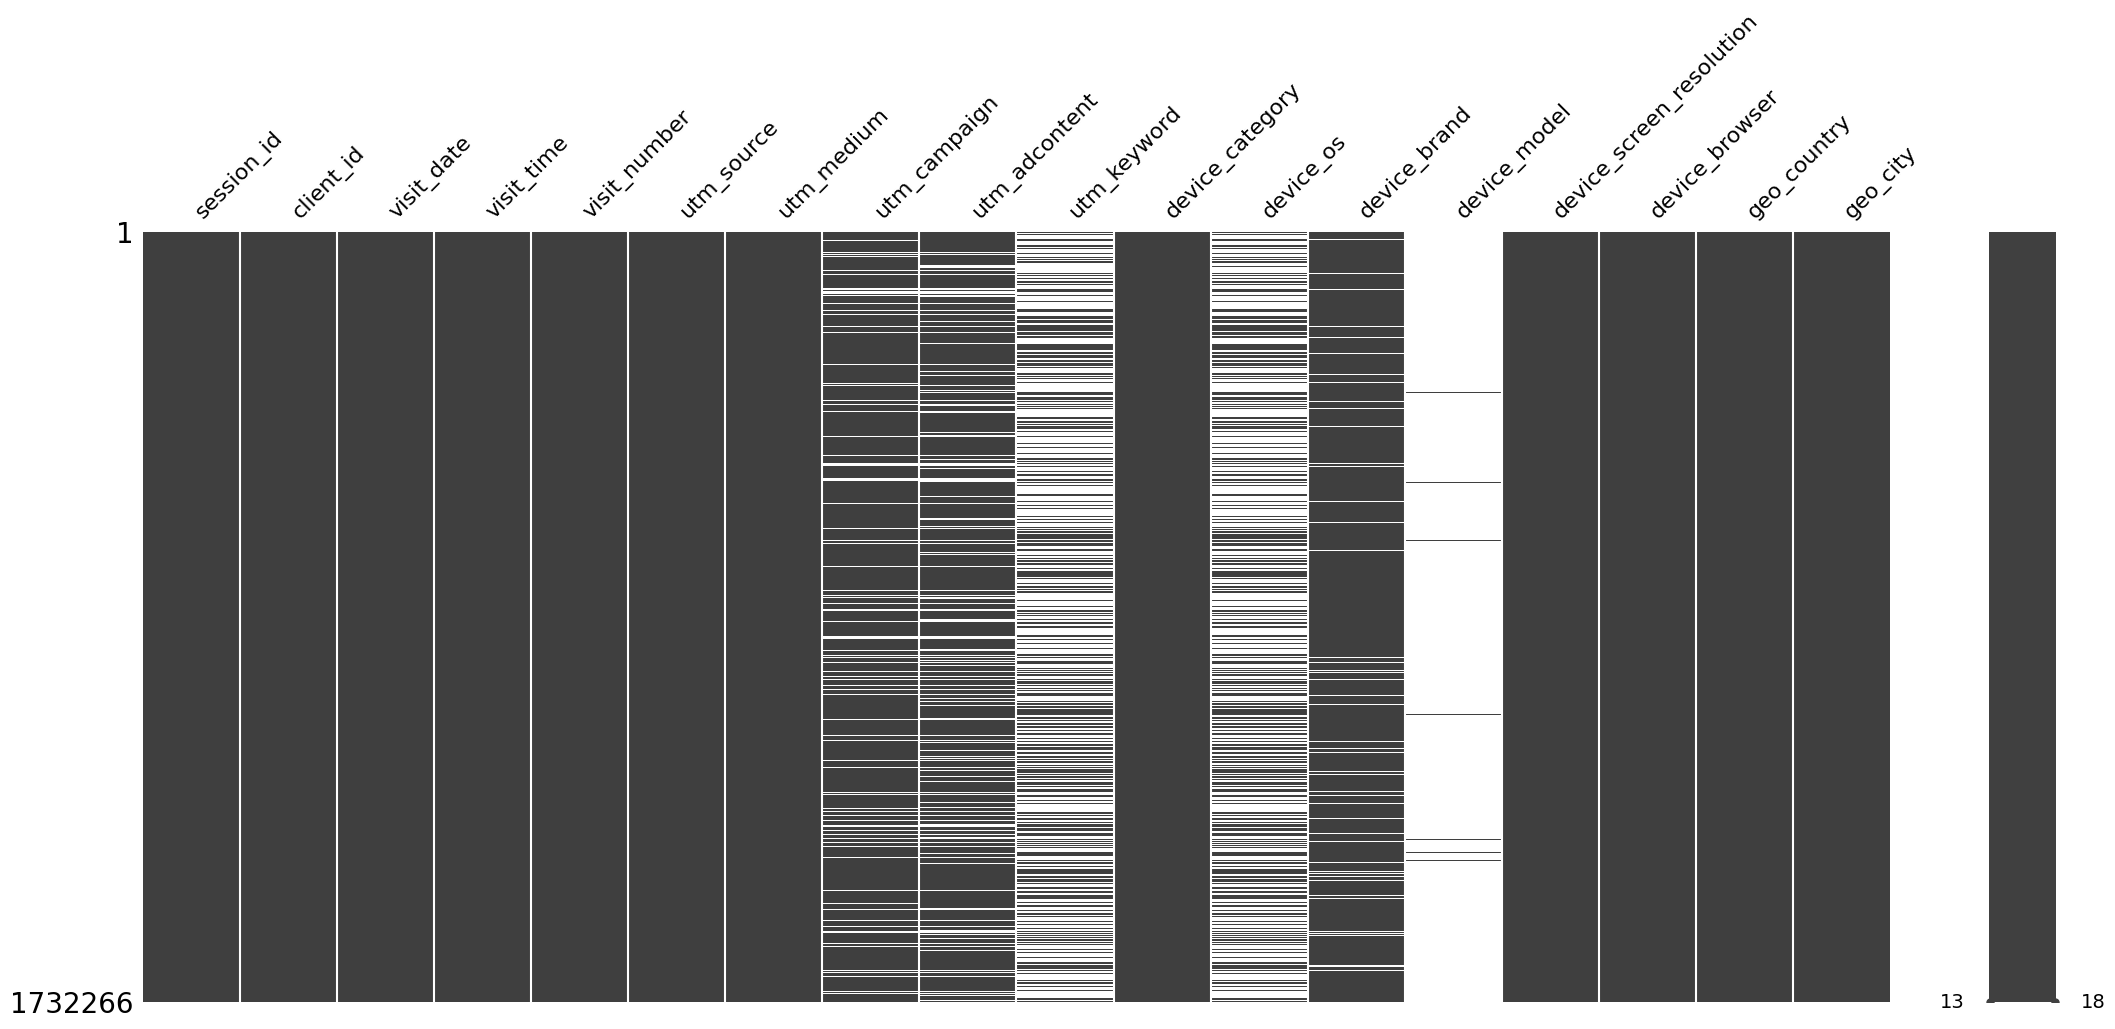

In [16]:
#Построение матрицы пропуском для датафрейма с информацией о визитах
msno.matrix(df_info_session)

In [17]:
#Формирование списка колонок датафрейма df_info_session с информацией о проценте пропущенных значений
missing_values = ((df_info_session.isna().sum() / len(df_info_session)) * 100).sort_values()

In [11]:
df_info_session[['utm_medium', 'utm_source', 'utm_campaign', 'utm_adcontent', 'utm_keyword']].corr()

C:\Users\Владимир Мельничук\AppData\Local\Temp\ipykernel_16068\512724412.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_info_session[['utm_medium', 'utm_source', 'utm_campaign', 'utm_adcontent', 'utm_keyword']].corr()


""


In [18]:
missing_values

session_id                   0.000000
device_browser               0.000000
device_screen_resolution     0.000000
device_category              0.000000
geo_country                  0.000000
utm_medium                   0.000000
geo_city                     0.000000
visit_number                 0.000000
visit_time                   0.000000
visit_date                   0.000000
client_id                    0.000000
utm_source                   0.004387
device_brand                 6.358030
utm_campaign                11.273500
utm_adcontent               17.557177
device_os                   58.533966
utm_keyword                 58.925823
device_model                99.130503
dtype: float64

#### Обработка пропусков для атрибута 'utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent', 'utm_keyword'
Атрибуты 'utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent', 'utm_keyword' очевидно взаимосвязаны друг с другом, в связи с этим обработку пропусков будем одновременно для всей группы атрибутов

In [10]:
#Формирование отдельного датасета с органическим трафиком и отображение описательной статистики для атрибутов 'utm_source', 'utm_campaign', 'utm_adcontent', 'utm_keyword'
set_organic_trafic = set(['organic', 'referral', '(none)'])
df_info_session[df_info_session.utm_medium.isin(set_organic_trafic)][['utm_source','utm_campaign','utm_adcontent', 'utm_keyword']].describe()

,utm_source,utm_campaign,utm_adcontent,utm_keyword
count,468920,463425,461085,119157
unique,208,214,185,266
top,fDLlAcSmythWSCVMvqvL,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo
freq,277060,421088,426205,87994


In [11]:
#Формирование отдельного датасета с платным трафиком и отображение описательной статистики для атрибутов 'utm_source', 'utm_campaign', 'utm_adcontent', 'utm_keyword'
df_info_session[df_info_session.utm_medium.isin(set_organic_trafic) == False][['utm_source','utm_campaign','utm_adcontent', 'utm_keyword']].describe()

,utm_source,utm_campaign,utm_adcontent,utm_keyword
count,1263270,1073554,967044,592357
unique,78,396,214,1135
top,ZpYIoDJMcFzVoPFsHGJL,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo
freq,552555,320071,509203,377956


Значения самых часто установленных значений атрибутов utm_source, utm_campaign для органического и платного трафиков отличается, что объясняется различием источников для трафиков и что учитывать разные виды трафиков целесообразнее в разных компаниях. В свою очередь, самые часто используемые значения атрибутов utm_adcontent и utm_keyword для обоих трафиков совпадают, так как рекламные тексты и ключевые слова очевидно совпадают (рекалама одна трафики разные). 

##### Обработка пропусков атрибута utm_source для органического трафика

In [12]:
#Отображение пропусков атрибута utm_source органического трафика
df_info_session.loc[(df_info_session.utm_medium.isin(set_organic_trafic)) & (df_info_session.utm_source.isna()),'utm_source']

Series([], Name: utm_source, dtype: object)

Обработка пропусков атрибута utm_source органического трафика не требуется

##### Обработка пропусков атрибута utm_source для платного трафика

In [13]:
#Отображение пропусков атрибута utm_source платного трафика
df_info_session.loc[(df_info_session.utm_medium.isin(set_organic_trafic) == False) & (df_info_session.utm_source.isna()),'utm_source']

77652      NaN
122841     NaN
136220     NaN
136221     NaN
139706     NaN
          ... 
1422564    NaN
1422565    NaN
1629110    NaN
1732460    NaN
1772156    NaN
Name: utm_source, Length: 76, dtype: object

In [14]:
#Установка для пропусков топового значения атрибута utm_source для платного трафика
df_info_session.loc[(df_info_session.utm_medium.isin(set_organic_trafic) == False) & (df_info_session.utm_source.isna()),'utm_source'] = df_info_session[df_info_session.utm_medium.isin(set_organic_trafic) == False]['utm_source'].describe()['top']

In [15]:
#Вывод количества пропущенных значения атрибута utm_source
df_info_session.utm_source.isna().sum()

0

##### Обработка пропусков атрибута utm_campaign для органического трафика

In [16]:
#Отображение пропусков атрибута utm_campaign органического трафика
df_info_session.loc[(df_info_session.utm_medium.isin(set_organic_trafic)) & (df_info_session.utm_campaign.isna()),'utm_campaign']

97         NaN
207        NaN
393        NaN
412        NaN
413        NaN
          ... 
1858933    NaN
1859126    NaN
1859165    NaN
1859552    NaN
1859583    NaN
Name: utm_campaign, Length: 5495, dtype: object

In [17]:
#Установка для пропусков топового значения атрибута utm_campaign для органического трафика
df_info_session.loc[(df_info_session.utm_medium.isin(set_organic_trafic)) & (df_info_session.utm_campaign.isna()),'utm_campaign'] = df_info_session[df_info_session.utm_medium.isin(set_organic_trafic)]['utm_campaign'].describe()['top']

##### Обработка пропусков атрибута utm_campaign для платного трафика

In [18]:
#Отображение пропусков атрибута utm_campaign платного трафика
df_info_session.loc[(df_info_session.utm_medium.isin(set_organic_trafic) == False) & (df_info_session.utm_campaign.isna()),'utm_campaign']

3          NaN
4          NaN
14         NaN
27         NaN
41         NaN
          ... 
1859982    NaN
1859987    NaN
1860018    NaN
1860020    NaN
1860037    NaN
Name: utm_campaign, Length: 189792, dtype: object

In [19]:
#Установка для пропусков топового значения атрибута utm_campaign для платного трафика
df_info_session.loc[(df_info_session.utm_medium.isin(set_organic_trafic) == False) & (df_info_session.utm_campaign.isna()),'utm_campaign'] = df_info_session[df_info_session.utm_medium.isin(set_organic_trafic) == False]['utm_campaign'].describe()['top']

In [20]:
#Вывод количества пропущенных значения атрибута utm_campaign
df_info_session.utm_campaign.isna().sum()

0

##### Обработка пропусков атрибута utm_adcontent для органического и платного трафика

In [21]:
#Отображение пропусков атрибута utm_adcontent для всех типов трафика трафика
df_info_session.loc[df_info_session.utm_adcontent.isna(),'utm_adcontent']

4          NaN
14         NaN
27         NaN
37         NaN
39         NaN
          ... 
1860018    NaN
1860020    NaN
1860031    NaN
1860035    NaN
1860037    NaN
Name: utm_adcontent, Length: 304137, dtype: object

In [22]:
#Установка для пропусков топового значения атрибута utm_adcontent для всех типов трафика
df_info_session.loc[df_info_session.utm_adcontent.isna(),'utm_adcontent'] = df_info_session['utm_adcontent'].describe()['top']

In [23]:
#Вывод количества пропущенных значения атрибута utm_adcontent
df_info_session.utm_adcontent.isna().sum()

0

##### Обработка пропусков атрибута utm_keyword для органического и платного трафика

In [24]:
#Отображение пропусков атрибута utm_keyword для всех типов трафика трафика
df_info_session.loc[df_info_session.utm_keyword.isna(),'utm_keyword']

3          NaN
4          NaN
5          NaN
7          NaN
9          NaN
          ... 
1860030    NaN
1860032    NaN
1860034    NaN
1860035    NaN
1860038    NaN
Name: utm_keyword, Length: 1020752, dtype: object

In [25]:
#Установка для пропусков топового значения атрибута utm_keyword для всех типов трафика
df_info_session.loc[df_info_session.utm_keyword.isna(),'utm_keyword'] = df_info_session['utm_keyword'].describe()['top']

In [26]:
#Вывод количества пропущенных значения атрибута utm_keyword
df_info_session.utm_keyword.isna().sum()

0

#### Обработка пропусков для атрибутов 'device_brand', 'device_os', 'device_model', device_browser', 'device_screen_resolution' и 'device_category'
Атрибуты 'device_brand', 'device_os', 'device_model', device_browser', 'device_screen_resolution' и 'device_category' очевидно взаимосвязаны друг с другом, в связи с этим обработку пропусков будем одновременно для всей группы атрибутов

#### Обработка пропусков для атрибута device_brand

In [36]:
#Посмотрим на количество уникальных значений и самое часто встречающееся значение атрибута device_brand
df_info_session.device_brand.describe()

count     1622128
unique        201
top         Apple
freq       503533
Name: device_brand, dtype: object

Многие производители телефонов, планшетов и ноутбуков, в меньшей степени это относится к персональным компьютерам, стараются поддерживать свою линейку экранов. В связи с этим будем опираться на данные по разрешению экранов и соответствущие им топовые значения брендов.

Предварительно создадим новый количественный признак, в который записшем общее количество пикселей для каждого разрешения

In [27]:
df_info_session['device_num_pixel'] = df_info_session.device_screen_resolution.apply(lambda x: int(x.split('x')[0]) * int(x.split('x')[1]))

C:\Users\Владимир Мельничук\AppData\Local\Temp\ipykernel_14788\3408085540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_info_session['device_num_pixel'] = df_info_session.device_screen_resolution.apply(lambda x: int(x.split('x')[0]) * int(x.split('x')[1]))


In [28]:
#Формирование множества уникальных знашений разрашений экранов, для которых заданы непустые значения атрибута device_brand
set_brand_notna = set(df_info_session[(df_info_session.device_brand.notna()) & (df_info_session.device_brand != '') & (df_info_session.device_brand != '(not set)')].device_num_pixel.unique())

In [29]:
#Формирование множества уникальных знашений разрашений экранов, для которых установлены пустые значения атрибута device_brand
set_brand_isna = set(df_info_session[(df_info_session.device_brand.isna()) | (df_info_session.device_brand == '') | (df_info_session.device_brand == '(not set)')].device_num_pixel.unique())

In [30]:
#Формирование множества уникальных значений разрешений экрана, которые входят одновременно в множество set_brand_notna 
#и set_brand_isna, то есть получим множество разрешений, по которым можно восстановить данные
set_intersec = set_brand_notna & set_brand_isna

In [41]:
#Вывод размера множества для восстановления данных
len(set_intersec)

446

In [31]:
#Построение справочника разрешений и соответствующих им топовых значений атрибута device_brand
dict_res_cat = {}
for res_cat in set_intersec:
    dict_res_cat[res_cat] = df_info_session[(df_info_session.device_num_pixel == res_cat) & ((df_info_session.device_brand.notna()) & (df_info_session.device_brand != '') & (df_info_session.device_brand != '(not set)'))].device_brand.describe()['top']

In [43]:
#Отобразим справочник
dict_res_cat

{1327104: 'Xiaomi',
 1024000: 'Samsung',
 0: 'Samsung',
 1310720: 'Apple',
 786432: 'Apple',
 460800: 'Xiaomi',
 3686400: 'Apple',
 589824: 'Xiaomi',
 921600: 'H96',
 2764800: 'Google',
 655360: 'Huawei',
 243720: 'LG',
 303120: 'Infinix',
 387105: 'Xiaomi',
 348198: 'Xiaomi',
 297000: 'Xiaomi',
 399408: 'Realme',
 415794: 'Xiaomi',
 352314: 'Mozilla',
 290880: 'Samsung',
 219200: 'Huawei',
 317520: 'Mozilla',
 907365: 'Samsung',
 317544: 'Google',
 389232: 'Huawei',
 364658: 'DEXP',
 227448: 'Huawei',
 483450: 'Huawei',
 311424: 'Samsung',
 262272: 'Samsung',
 182400: 'Huawei',
 282752: 'Nokia',
 331776: 'Huawei',
 284800: 'Xiaomi',
 567443: 'Sony',
 376980: 'Samsung',
 1396890: 'Samsung',
 315549: 'Nokia',
 266400: 'Samsung',
 379056: 'Huawei',
 522424: 'Xiaomi',
 471225: 'LeEco',
 260280: 'Xiaomi',
 1067200: 'Samsung',
 196608: 'Apple',
 344268: 'Vivo',
 254160: 'Huawei',
 567508: 'Samsung',
 360672: 'Mozilla',
 280800: 'Huawei',
 215280: 'Samsung',
 428275: 'Google',
 393460: 'Sams

In [32]:
#Вывод количества записей с пропусками в значениях атрибута device_brand до установки значений
df_info_session[(df_info_session.device_brand.isna()) | (df_info_session.device_brand == '') | (df_info_session.device_brand == '(not set)')].device_num_pixel.count()

363588

In [33]:
#Заполнение пропусков значений атрибута device_brand для записей датасета, у которых значение атрибута 
#device_num_pixel содержится в множестве set_intersec
df_info_session.loc[((df_info_session.device_brand.isna()) | (df_info_session.device_brand == '') | (df_info_session.device_brand == '(not set)')) & (df_info_session.device_num_pixel.isin(set_intersec) == True) ,'device_brand'] = df_info_session[((df_info_session.device_brand.isna()) | (df_info_session.device_brand == '') | (df_info_session.device_brand == '(not set)')) & (df_info_session.device_num_pixel.isin(set_intersec) == True)].apply(lambda x: dict_res_cat[x.device_num_pixel], axis=1)

In [34]:
#Вывод количества записей с пропусками в значениях атрибута device_brand после установки значений
df_info_session[(df_info_session.device_brand.isna()) | (df_info_session.device_brand == '') | (df_info_session.device_brand == '(not set)')].device_num_pixel.count()

19572

In [47]:
#Формирование описательной статистики атрибута device_num_pixel для оставшихся записей датасета с пустыми значениями 
#атритбута device_brand
df_info_session[df_info_session.device_brand.isna() | 
                (df_info_session.device_brand == '') | 
                (df_info_session.device_brand == '(not set)')
               ].device_num_pixel.describe().apply("{0:.5f}".format)

count       19572.00000
mean      2065527.76936
std       1878805.29186
min         76800.00000
25%       1076480.00000
50%       1597380.00000
75%       2359296.00000
max      32000000.00000
Name: device_num_pixel, dtype: object

In [48]:
#Формирование описательной статистики атрибута device_category для оставшихся записей датасета с пустыми значениями 
#атритбута device_brand
df_info_session[df_info_session.device_brand.isna() | (df_info_session.device_brand == '') | (df_info_session.device_brand == '(not set)')].device_category.describe()

count       19572
unique          3
top       desktop
freq        19226
Name: device_category, dtype: object

В большинстве своем остались пустыми значения атрибута device_brand для записей, соотвествующие персональным компьютерам. Опираясь на данные по ОС можно попытаться заполнить оставшиеся пропуски

In [35]:
#Формируем список ОС, которые встречаются а качестве значений атрибута device_os оставшихся с пропусками записей датасета
list_os = []
list_os = df_info_session[(df_info_session.device_brand.isna() | (df_info_session.device_brand == '') | (df_info_session.device_brand == '(not set)')) & ((df_info_session.device_os.notna()) & (df_info_session.device_os != '') & (df_info_session.device_os != '(not set)'))].device_os.unique()

In [50]:
#Выведем значения списка
list_os

array(['Windows', 'Macintosh', 'Linux', 'Android', 'Chrome OS'],
      dtype=object)

In [36]:
#Формирование справочника ОС и соответствующие им топовые значения брендов
dict_cat_brand = {}
for cat in df_info_session.device_category.unique():
    dict_os_brand = {}
    for os in list_os:
        dict_os_brand[os] = df_info_session[(df_info_session.device_category == cat) & (df_info_session.device_os == os) & ((df_info_session.device_brand.notna()) & (df_info_session.device_brand != '') & (df_info_session.device_brand != '(not set)'))].device_brand.describe()['top']
    dict_cat_brand[cat] = dict_os_brand

In [37]:
#Отображение содержимого справочника
dict_cat_brand

{'mobile': {'Windows': 'Samsung',
  'Macintosh': 'Apple',
  'Linux': 'Xiaomi',
  'Android': 'Samsung',
  'Chrome OS': nan},
 'tablet': {'Windows': nan,
  'Macintosh': 'Apple',
  'Linux': 'Samsung',
  'Android': 'Samsung',
  'Chrome OS': nan},
 'desktop': {'Windows': 'Samsung',
  'Macintosh': 'Apple',
  'Linux': 'Samsung',
  'Android': 'Xiaomi',
  'Chrome OS': 'Samsung'}}

In [38]:
#Заполнение пропусков
df_info_session.loc[((df_info_session.device_brand.isna()) | (df_info_session.device_brand == '') | (df_info_session.device_brand == '(not set)')) & ((df_info_session.device_os.notna()) & (df_info_session.device_os != '') & (df_info_session.device_os != '(not set)')),'device_brand'] = df_info_session[((df_info_session.device_brand.isna()) | (df_info_session.device_brand == '') | (df_info_session.device_brand == '(not set)')) & ((df_info_session.device_os.notna()) & (df_info_session.device_os != '') & (df_info_session.device_os != '(not set)'))].apply(lambda x: dict_cat_brand[x.device_category][x.device_os], axis=1)

In [39]:
#Отображение количества записей дата сета с пропущенными значениями атрибута device_brand
df_info_session[(df_info_session.device_brand.isna()) | (df_info_session.device_brand == '') | (df_info_session.device_brand == '(not set)')].client_id.count()

13060

Предположим, что пользователи, которые заходили несколько раз, пользовались одинаковыми устройствами.

In [40]:
#Формирования множества уникальных значенией атрибута client_id, у которых остались пропуски для атрибута device_brand
set_client = set(df_info_session[(df_info_session.device_brand.isna()) | (df_info_session.device_brand == '') | (df_info_session.device_brand == '(not set)')].client_id.unique())

In [41]:
#Формирование множества уникальных значений атрибута client_id из множества set_client, для котоых существуют записи датасета без пропущенных значений
#атрибута device_brand
set_client_notna = set(df_info_session[(df_info_session.device_brand.notna()) & (df_info_session.device_brand != '') & (df_info_session.device_brand != '(not set)') & (df_info_session.client_id.isin(set_client))].client_id.unique())

In [42]:
#Вывод размеров обоих множеств
len(set_client_notna), len(set_client)

(232, 10487)

In [58]:
#Формируем справочник клиентов и соответствующих им топовых значений атрибута device_brand
dict_client_brand = {}
for client in set_client_notna:
    dict_client_brand[client] = df_info_session[(df_info_session.client_id == client) & ((df_info_session.device_brand.notna()) & (df_info_session.device_brand != '') & (df_info_session.device_brand != '(not set)'))].device_brand.describe()['top']

In [59]:
#Заполнение пропусков
df_info_session.loc[(df_info_session.client_id.isin(set_client_notna)) & ((df_info_session.device_brand.isna()) | (df_info_session.device_brand == '') | (df_info_session.device_brand == '(not set)')),'device_brand'] = df_info_session[(df_info_session.client_id.isin(set_client_notna)) & ((df_info_session.device_brand.isna()) | (df_info_session.device_brand == '') | (df_info_session.device_brand == '(not set)'))].apply(lambda x: dict_client_brand[x.client_id], axis=1)

In [43]:
#Отображение количества записей дата сета с пропущенными значениями атрибута device_brand
df_info_session[(df_info_session.device_brand.isna()) | (df_info_session.device_brand == '') | (df_info_session.device_brand == '(not set)')].client_id.count()

13060

In [44]:
#Оставшиеся пропуски заполним самым часто установленным значением атрибута device_brand
df_info_session.loc[(df_info_session.device_brand.isna()) | (df_info_session.device_brand == '') | (df_info_session.device_brand == '(not set)'),'device_brand'] = df_info_session.device_brand.describe()['top']

In [45]:
#Отображение количества записей дата сета с пропущенными значениями атрибута device_brand
df_info_session[(df_info_session.device_brand.isna()) | (df_info_session.device_brand == '') | (df_info_session.device_brand == '(not set)')].client_id.count()

0

#### Обработка пропусков для атрибута device_os

In [46]:
#Формирование множества уникальных значенией атрибута device_brand, у которых установлены пропуски для атрибута device_os
set_client_os_na = set(df_info_session[((df_info_session.device_os.isna()) | (df_info_session.device_os == '') | (df_info_session.device_os == '(not set)')) & (df_info_session.device_brand.notna()) & (df_info_session.device_brand != '') & (df_info_session.device_brand != '(not set)')].device_brand.unique())

In [64]:
#Вывод множества
set_client_os_na

{'A1',
 'AGM',
 'AT&T',
 'Acer',
 'Advan',
 'Alcatel',
 'Alldocube',
 'Amazon',
 'Ananda',
 'Apple',
 'Archos',
 'Ark',
 'Artel',
 'Asus',
 'BLU',
 'BLUBOO',
 'BQ',
 'Beelink',
 'Billion',
 'Black Fox',
 'BlackBerry',
 'Blackview',
 'CAT',
 'Caterpillar',
 'Celkon',
 'Centric',
 'China Mobile',
 'China Phone',
 'China TVBox',
 'Chuwi',
 'Condor',
 'Coolpad',
 'Corn',
 'Cube',
 'Cubot',
 'DEXP',
 'DOOGEE',
 'Dark',
 'Digma',
 'Dragon Touch',
 'E&L',
 'Elephone',
 'Essential',
 'Evercoss',
 'Evertek',
 'Fero',
 'Flexymove',
 'Fly',
 'Flylion',
 'Fujitsu',
 'General Mobile',
 'Geotel',
 'Gionee',
 'Gome',
 'Google',
 'Gretel',
 'Guophone',
 'H96',
 'HOMTOM',
 'HTC',
 'Haier',
 'Highscreen',
 'Hisense',
 'Honeywell',
 'How',
 'Huawei',
 'INUI',
 'InFocus',
 'Infinix',
 'Inoi',
 'Irbis',
 'Iris',
 'Itoos',
 'Jiake',
 'Jiayu',
 'Karbonn',
 'Kata',
 'Kingplay',
 'Komu',
 'Kyocera',
 'LG',
 'LTC',
 'Land Rover',
 'Lava',
 'LeEco',
 'LeTV',
 'Leagoo',
 'Lenovo',
 'M-HORSE',
 'MLS',
 'MTC',
 'MT

In [47]:
#Формирование справочника категорий, который соответствуют справочники брендов с топовыми значениями атрибутов device_os
dict_brand_os = {}
for cat in df_info_session.device_category.unique():
    dict_band_cat_os = {}
    for brand in set_client_os_na:
        dict_band_cat_os[brand] = df_info_session[(df_info_session.device_brand == brand) & ((df_info_session.device_os.notna()) & (df_info_session.device_os != '') & (df_info_session.device_os != (not set)))].device_os.describe()['top']
    dict_brand_os[cat] = dict_band_cat_os

In [49]:
joblib.dump({
        'dict_res_cat': dict_res_cat,
        'dict_cat_brand': dict_cat_brand,
        'dict_brand_os' : dict_brand_os
        }, 'data/dicts.pkl')

['data/dicts.pkl']

In [66]:
#Вывод справочника
dict_brand_os

{'mobile': {'Alldocube': 'Android',
  'BLUBOO': 'Android',
  'OPPO': 'Android',
  'Ulefone': 'Android',
  'Archos': 'Android',
  'MediaTek': 'Android',
  'Irbis': 'Android',
  'Panasonic': 'Android',
  'Wigor': 'Android',
  'Vsmart': 'Android',
  'Nomu': 'Android',
  'TCL': 'Android',
  'Tanix': nan,
  'Philips': 'Android',
  'Kyocera': 'Android',
  'Acer': 'Android',
  'Poptel': 'Android',
  'InFocus': 'Android',
  'Yota Devices': 'Android',
  'Jiake': 'Android',
  'Sony': 'Android',
  'Pantech': 'Android',
  'Infinix': 'Android',
  'UMI': 'Android',
  'LeTV': 'Android',
  'TP-Link': 'Android',
  'Condor': nan,
  'Nuu': 'Android',
  'Xiaomi': 'Android',
  'Ark': 'Android',
  'DOOGEE': 'Android',
  'Umidigi': 'Android',
  'Flylion': nan,
  'POCO': 'Android',
  'Gionee': 'Android',
  'Cube': nan,
  'Chuwi': 'Android',
  'Walton': nan,
  'Fero': nan,
  'Land Rover': nan,
  'NOA': 'Android',
  'E&L': 'Android',
  'Apple': 'iOS',
  'Advan': 'Android',
  'Huawei': 'Android',
  'Nomi': nan,


In [67]:
#Количество записей с пропущенными значениями
df_info_session[(df_info_session.device_os.isna()) | (df_info_session.device_os == '') | (df_info_session.device_os == '(not set)')].client_id.count()

1014273

In [68]:
#Заполнение пропусков
df_info_session.loc[((df_info_session.device_os.isna()) | (df_info_session.device_os == '') | (df_info_session.device_os == '(not set)')) & ((df_info_session.device_brand.notna()) & (df_info_session.device_brand != '') & (df_info_session.device_brand != '(not set)')), 'device_os'] = df_info_session[((df_info_session.device_os.isna()) | (df_info_session.device_os == '') | (df_info_session.device_os == '(not set)')) & ((df_info_session.device_brand.notna()) & (df_info_session.device_brand != '') & (df_info_session.device_brand != '(not set)'))].apply(lambda x: dict_brand_os[x.device_category][x.device_brand], axis=1)

In [69]:
#Количество записей с пропусками после заполнения данными
df_info_session[(df_info_session.device_os.isna()) | (df_info_session.device_os == '') | (df_info_session.device_os == '(not set)')].client_id.count()

69

In [70]:
#Заполнение пропусков наиболее популярным значением атрибута device_os
df_info_session.loc[(df_info_session.device_os.isna()) | (df_info_session.device_os == '') | (df_info_session.device_os == '(not set)'), 'device_os'] = df_info_session.device_os.describe()['top']

In [71]:
#Количество записей с пропусками после заполнения данными
df_info_session[(df_info_session.device_os.isna()) | (df_info_session.device_os == '') | (df_info_session.device_os == '(not set)')].client_id.count()

0

#### Обработка пропусков для атрибута device_model

In [72]:
df_info_session.device_model.describe()

count                    15062
unique                     104
top       AuMdmADEIoPXiWpTsBEj
freq                      9018
Name: device_model, dtype: object

In [81]:
df_info_session.to_pickle('data/df_info_session.pkl')

### Обработка пропусков в данных в датафрейме с информацией о событиях во время визитов

<AxesSubplot: >

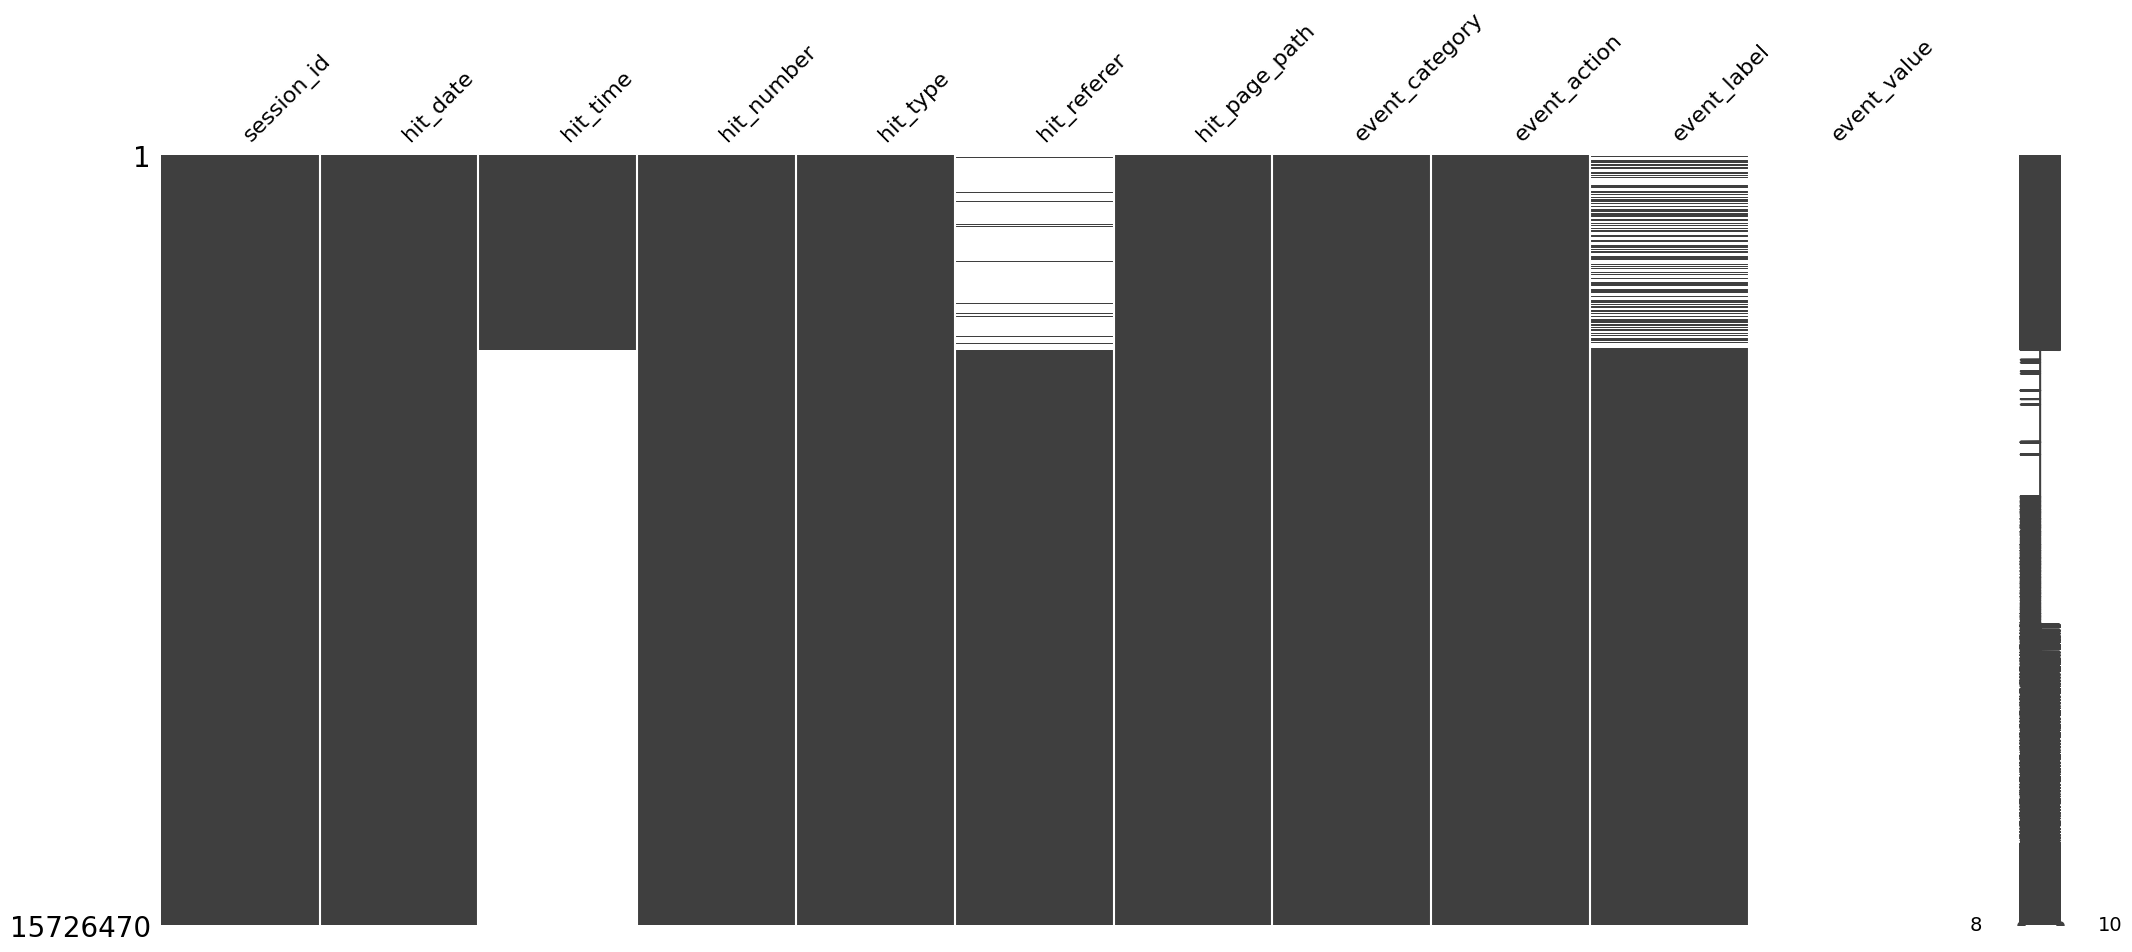

In [73]:
msno.matrix(df_hit)

In [74]:
missing_values_hit = (((df_hit.isna().sum()) / len(df_hit)) * 100).sort_values()

In [75]:
missing_values_hit

session_id          0.000000
hit_date            0.000000
hit_number          0.000000
hit_type            0.000000
hit_page_path       0.000000
event_category      0.000000
event_action        0.000000
event_label        23.909905
hit_referer        39.899634
hit_time           58.247795
event_value       100.000000
dtype: float64

#### Обработка пропусков для атрибутов 'hit_time'

In [5]:
target_action =  ['sub_car_claim_click', 'sub_car_claim_submit_click',
'sub_open_dialog_click', 'sub_custom_question_submit_click',
'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success',
'sub_car_request_submit_click']

In [7]:
#Формирование множества уникальных значений атрибута session_id для визитов с пропущенными значениями атрибута hit_time
set_sessions_natime = set(df_hit[(df_hit.hit_time.isna())].session_id.unique())

In [8]:
#Для удобства работы с пропущеннвми значениями атрибута hit_time добавим новый признак hit_time_nan, для которого будет
#установлено значение '1', если нет пропуска и значение '0', если есть пропуск значения атрибута hit_time.
df_hit['hit_time_nan'] = np.where(df_hit['hit_time'].isnull(), 0,1)

In [9]:
#Вывод количества пропущенных и заполненных значений атрибута hit_time.
df_hit['hit_time_nan'].value_counts()

0    9160322
1    6566148
Name: hit_time_nan, dtype: int64

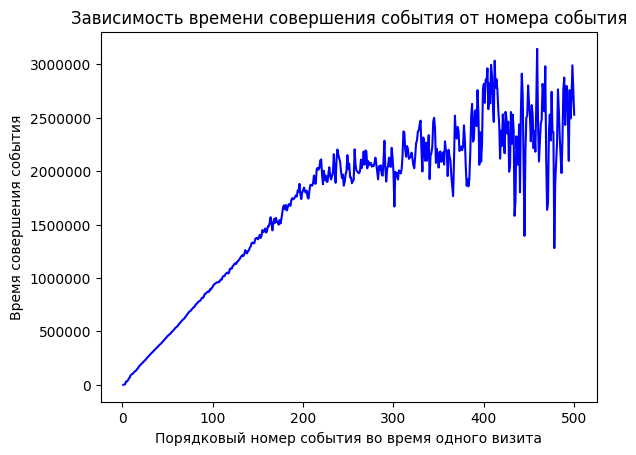

In [10]:
#Построение графика зависимости времени совершения события от номера события
plt.plot(df_hit[df_hit.hit_time_nan == 1].groupby(
                                                  ['hit_number']).aggregate(
                                                                            {'hit_time':'mean'}), 
         color='blue');
plt.xlabel('Порядковый номер события во время одного визита')
plt.ylabel('Время совершения события')
plt.ticklabel_format(style='plain')
plt.title('Зависимость времени совершения события от номера события');

In [11]:
#Вывод коэффициента корреляции между временем совершения события и номером события
df_hit[df_hit.hit_time_nan == 1].hit_number.corr(df_hit[df_hit.hit_time_nan == 1].hit_time)

0.60590638638219

In [12]:
#Формирование справочника номеров событий и соответствующих им средних значений времен совершения событий
dict_num_time = {}
for num in range(1,df_hit.hit_number.max()+1):
    dict_num_time[num] = df_hit[(df_hit.hit_number == num) & (df_hit.hit_time_nan == 1)].hit_time.mean()

In [81]:
#Вывод справочника
dict_num_time

{1: 0.0,
 2: 1868.6092498685412,
 3: 5481.868287445712,
 4: 31083.76290192094,
 5: 31183.991983980515,
 6: 39783.51298088332,
 7: 57519.99564511935,
 8: 67308.28618596807,
 9: 87138.54953194158,
 10: 96902.65602656714,
 11: 101670.2615869699,
 12: 107254.51403496585,
 13: 120137.10935318521,
 14: 126652.25115201208,
 15: 132654.93767313779,
 16: 143914.40080980974,
 17: 153351.45435779815,
 18: 166311.2666872534,
 19: 178414.2817367731,
 20: 186223.20846427,
 21: 195218.2396473218,
 22: 203587.01145524718,
 23: 211424.47807284404,
 24: 220245.77751299826,
 25: 229047.06673293366,
 26: 237955.52030292022,
 27: 249558.29203643568,
 28: 259020.30651821912,
 29: 268359.9106231596,
 30: 276594.0550438072,
 31: 286141.3047393999,
 32: 294630.5258402602,
 33: 303995.663247241,
 34: 311135.46966596134,
 35: 319854.14440466184,
 36: 329078.6297311382,
 37: 339154.68930276204,
 38: 346541.0041900648,
 39: 355096.7833101973,
 40: 364804.5811651652,
 41: 373221.12328594155,
 42: 380746.7826607751,

In [13]:
#Заполнение пропусков значений атрибута hit_time
df_hit.loc[df_hit.hit_time.isna(),'hit_time'] = df_hit[df_hit.hit_time.isna()].apply(lambda x: dict_num_time[x.hit_number], 
                                                                                     axis=1)

In [14]:
#Переопределение значений признака hit_time_nan для оценки оставшихся пропусков значений атрибута hit_time
df_hit.loc[:,'hit_time_nan'] = np.where(df_hit['hit_time'].isnull(), 0,1)

In [15]:
#Вывод количества пропущенных и заполненных значений атрибута hit_time.
df_hit['hit_time_nan'].value_counts()

1    15726470
Name: hit_time_nan, dtype: int64

#### Обработка пропусков для атрибутов 'hit_refer'

In [16]:
#Вывод описательной статистики для атрибута hit_refer
df_hit[df_hit.hit_referer.notna()].hit_referer.describe()

count                  9451666
unique                   37873
top       HbolMJUevblAbkHClEQa
freq                   8879187
Name: hit_referer, dtype: object

In [17]:
#Замена пропусков значений атрибута hit_referer наиболее частым значением
df_hit.loc[df_hit.hit_referer.isna(), 'hit_referer'] = df_hit[df_hit.hit_referer.notna()].hit_referer.describe()['top']

In [18]:
#Вывод количества пропущенных значений атрибута hit_referer
len(df_hit[df_hit.hit_referer.isna()])

0

### Удаление выбросов
#### Анализ и удаление выбросов датасета df_hit
#### Анализ выбросов в hit_number

In [6]:
#Формирование множества уникальных ссесий с конверсией
set_session_action = set(df_hit[df_hit.event_action.isin(target_action)].session_id.unique())

NameError: name 'df_hit' is not defined

In [45]:
#Вывод описательной статистики для атрибута hit_number
df_hit.hit_number.describe().apply("{0:.5f}".format)

count    15726470.00000
mean           23.56715
std            28.87713
min             1.00000
25%             7.00000
50%            15.00000
75%            29.00000
max           500.00000
Name: hit_number, dtype: object

In [57]:
#Формирование датасета с максимальным количеством событий каждой сессии
df_hit_gr_number = df_hit.groupby('session_id').aggregate({'hit_number':'max'})

Text(0, 0.5, 'Частота')

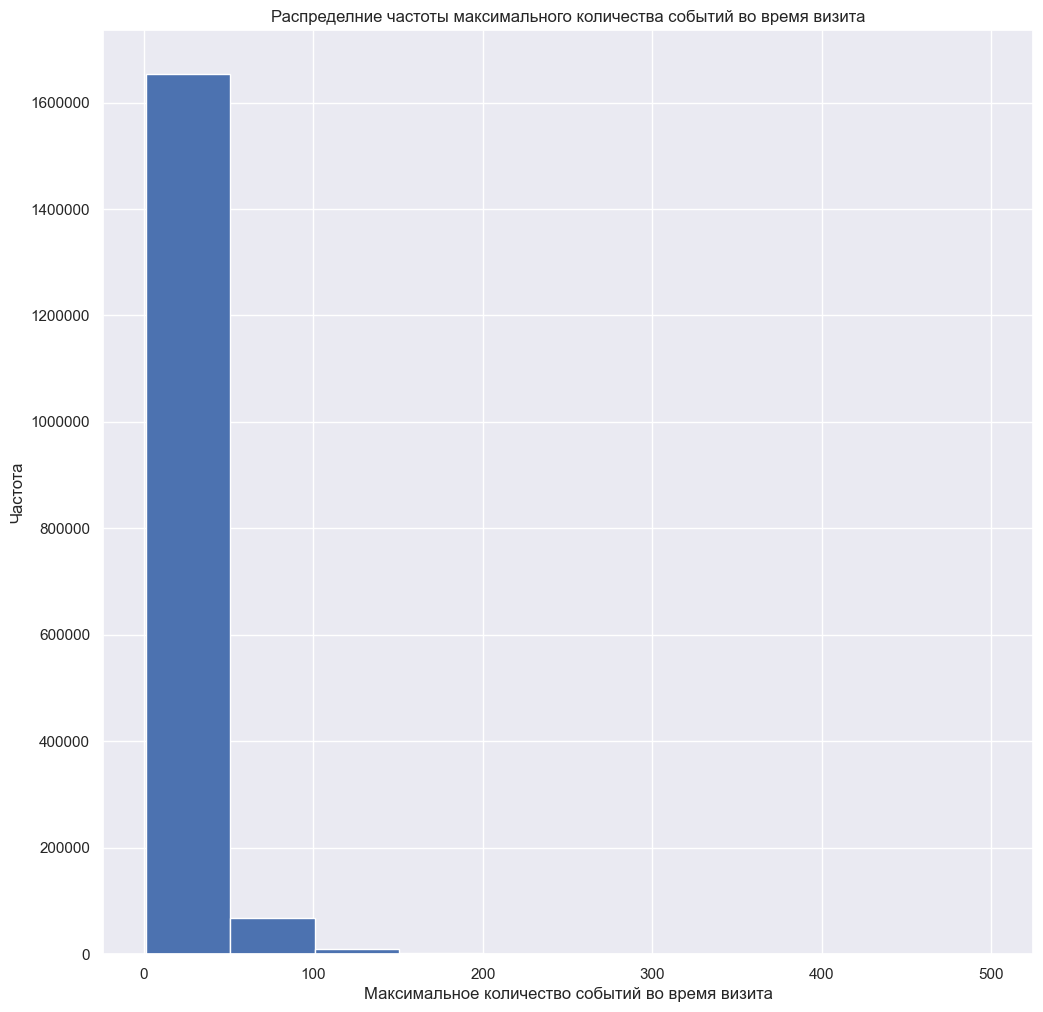

In [51]:
#Построение гистограммы распределния частоты максимального количества событий во время визита
df_hit_gr_number.hit_number.hist(figsize=(12,12))
plt.title('Распределние частоты максимального количества событий во время визита')
plt.ticklabel_format(style='plain')
plt.xlabel('Максимальное количество событий во время визита')
plt.ylabel('Частота')

Можно определить границы для отсечения записей с выбросами в номерах событий, но чтобы минимизировать потери конверсионных событий сформируем датасет с минимальными номерами конверионных событий

In [58]:
#Формирование датасета с минимальным номером конверсионного события
df_hit_gr_number_2 = df_hit[df_hit.event_action.isin(target_action)].groupby('session_id').aggregate({'hit_number':'min'})

In [59]:
#Вывод описательной статитстики для минимального номера события конверсионного события
df_hit_gr_number_2.hit_number.describe()

count    50760.000000
mean        25.216844
std         24.665113
min          1.000000
25%         10.000000
50%         18.000000
75%         32.000000
max        432.000000
Name: hit_number, dtype: float64

Text(0, 0.5, 'Частота')

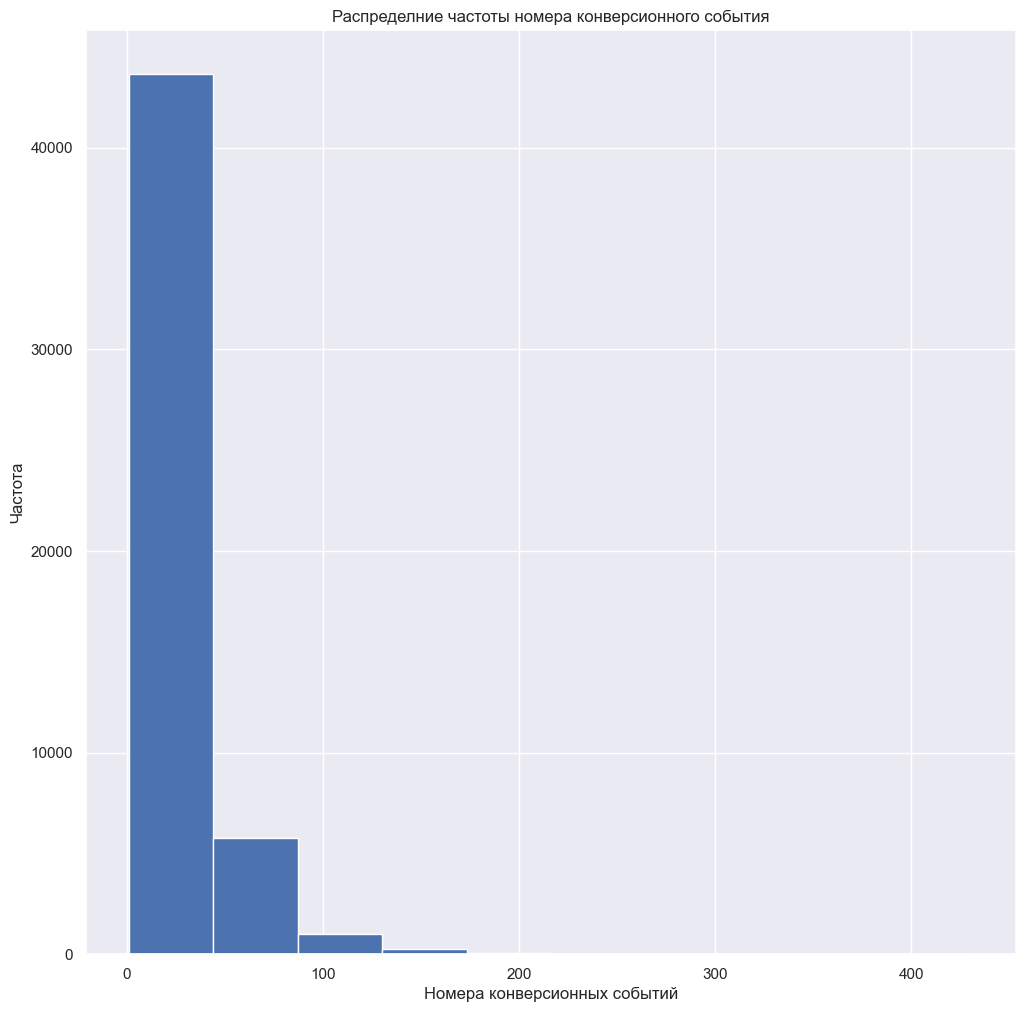

In [62]:
#Построение гистограммы распределния частоты минимальных номеров конверсионных событий
df_hit_gr_number_2.hit_number.hist(figsize=(12,12))
plt.title('Распределние частоты номера конверсионного события')
plt.ticklabel_format(style='plain')
plt.xlabel('Номера конверсионных событий')
plt.ylabel('Частота')

In [63]:
#Установка границ для отсечения выбросов в количестве событий во время одного визита
borders_hit_number = outliers_borders(df_hit_gr_number_2.hit_number)

In [64]:
borders_hit_number

(-23.0, 65.0)

In [65]:
len(df_hit[df_hit.hit_number > borders_hit_number[1]])

961147

In [66]:
#Сформируем новый датасет без выбросов в номерах событий
df_hit_clean = df_hit[df_hit.hit_number <= borders_hit_number[1]]

In [5]:
df_hit_clean = pd.read_pickle('data/df_hit_clean.pkl')

#### Анализ и удаление выбросов в hit_time

In [5]:
#Вывод описательной статистики для атриббута hit_time
df_hit_clean.hit_time.describe().apply("{0:.5f}".format)

count    14765323.00000
mean       162220.56755
std        205041.56780
min             0.00000
25%         36377.00000
50%        107254.51403
75%        220245.77751
max       7229409.00000
Name: hit_time, dtype: object

По описательной статистике видно что возможно есть выбросы, но необходимо учитывать что для разных номеров событий могут быть свои номальные значении времени совершения события и выбросы. В связи с этим попробуем найти подход к поиску выбромов, учитывающий данный аспект

In [12]:
#Формирование датасета с группировкой по атрибуту hit_number с аггрегирующей функцией mean для значений атрибута hit_time
df_gr_hit_time_2 = df_hit_clean.groupby('hit_number',as_index=False).aggregate({'hit_time':'mean'})

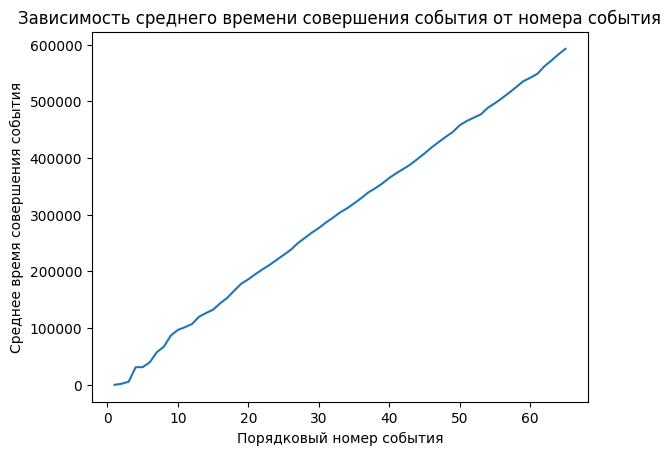

In [13]:
#Формирование графика зависимости среднего времени совершения события от номера события
plt.plot(df_gr_hit_time_2.hit_number,df_gr_hit_time_2.hit_time)
plt.xlabel("Порядковый номер события")
plt.ylabel('Среднее время совершения события')
plt.title('Зависимость среднего времени совершения события от номера события');

Явно выраженная линейная зависимость между временем совершения события и номером события

In [6]:
#Добавление новый атрибут датасета коэфициент отношения времени совершения события и номера события
df_hit_clean['hit_time_coef'] = df_hit_clean.apply(lambda x: x.hit_time/x.hit_number,
                                                       axis=1
                                                      )

Text(0, 0.5, 'Частота')

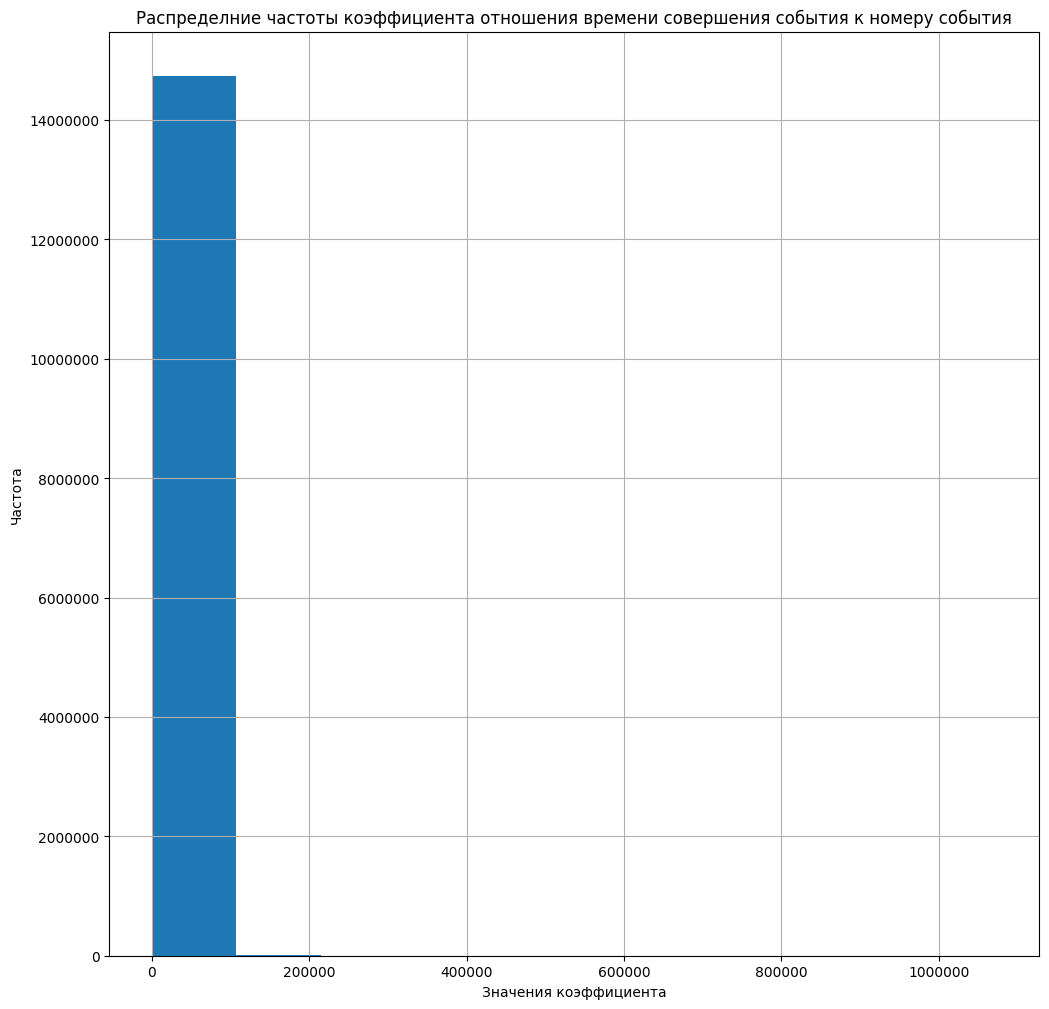

In [7]:
df_hit_clean.hit_time_coef.hist(figsize=(12,12))
plt.title('Распределние частоты коэффициента отношения времени совершения события к номеру события')
plt.ticklabel_format(style='plain')
plt.xlabel('Значения коэффициента')
plt.ylabel('Частота')

In [7]:
#Формирование описательной статистики для нового атрибута hit_time_coef
df_hit_clean.hit_time_coef.describe().apply("{0:.5f}".format)

count    14765323.00000
mean         8027.82950
std          9705.91086
min             0.00000
25%          4216.53333
50%          8843.66251
75%          9241.31610
max       1073942.00000
Name: hit_time_coef, dtype: object

In [8]:
#Формирование границ для отсечения выбросов
borders_time = outliers_borders(df_hit_clean.hit_time_coef)

In [17]:
borders_time

(-3320.640822803419, 16778.49026022792)

In [19]:
#Так как выбросы на макимальной стороне, то заменим значения выбросы атрибута hit_time_coef на максимальную границу borders_time
df_hit_clean.loc[(df_hit_clean.hit_time_coef < borders_time[0]) | 
                 (df_hit_clean.hit_time_coef > borders_time[1]), 'hit_time_coef'] = borders_time[1]

In [23]:
df_hit_clean.to_pickle('data/df_hit_clean.pkl')

#### Анализ и удаление выбросов датасета df_info_session
#### Анализ количества визитов

Для оценки количества визитов по месяцам, дням и часам создадим новые атрибуты для датасета df_info_session

In [2]:
df_info_session = pd.read_pickle('data/df_info_session.pkl')

In [3]:
#Создаем новый атрибут 'visit_datetime' типа timestamp
df_info_session.loc[:, 'visit_datetime'] = df_info_session.apply(lambda x: pd.to_datetime(str(x.visit_date) + ' ' + str(x.visit_time)), axis=1)

C:\Users\Владимир Мельничук\AppData\Local\Temp\ipykernel_7604\3361045091.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_info_session.loc[:, 'visit_datetime'] = df_info_session.apply(lambda x: pd.to_datetime(str(x.visit_date) + ' ' + str(x.visit_time)), axis=1)


In [4]:
#Создаем новый атрибут 'visit_month', который будет хранить информацию о месяце визита
df_info_session['visit_month'] = df_info_session.visit_datetime.dt.month

In [5]:
#Создаем новый атрибут 'visit_day', который будет хранить информацию о дне визита
df_info_session['visit_day'] = df_info_session.visit_datetime.dt.day

In [6]:
#Создаем новый атрибут 'visit_hour', который будет хранить информацию о часе дня визита
df_info_session['visit_hour'] = df_info_session.visit_datetime.dt.hour

In [6]:
#Формируем датасет с информацией о количестве визитов по месяцам
df_gr_month_count = df_info_session.groupby('visit_month').aggregate({'client_id':'count'})

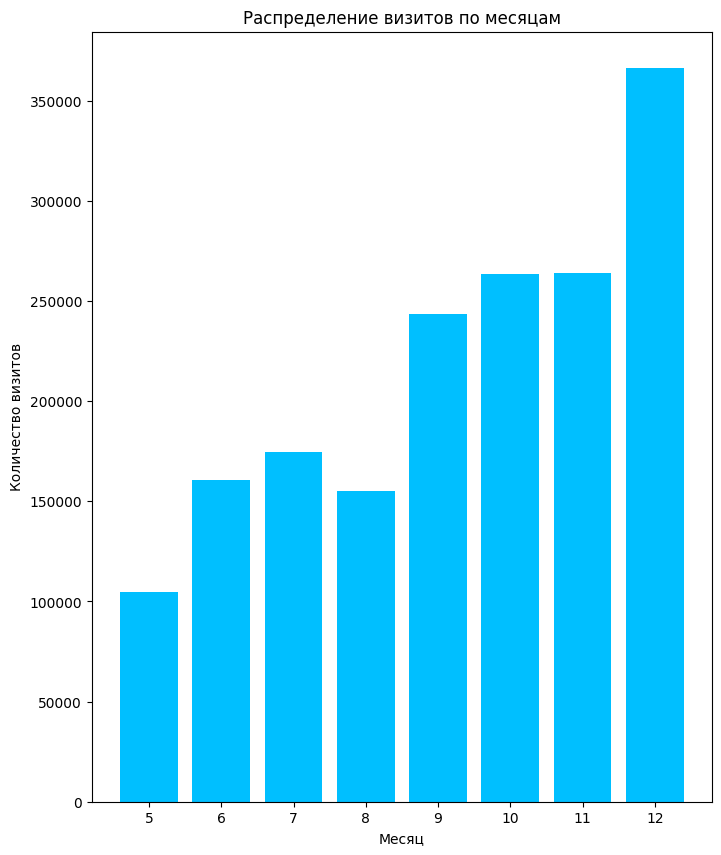

In [9]:
#Строим график распределения визитов по месяцам
plt.figure(figsize=(8,10))
plt.bar(df_gr_month_count.index, df_gr_month_count.client_id, color='deepskyblue')
plt.xlabel('Месяц')
plt.ylabel('Количество визитов')
plt.title('Распределение визитов по месяцам');

Так как проект только стартовал в мае 2021, то закономерно не большое количество визитов относительно других месяцев, с постепенным нарастанием количества визитов к концу года. Скачок в конце года скорее всего связан с тем, что часто решение о приобритении машины (приобретение машины в кредит или лизинг и подписка схожие продукты) принимается в конце года, период скидок (вернее информационного фона с решением поднять цены с нового года), наиболее доходный месяц для многих потенциальных клиентов.

In [7]:
#Преобразование атрибута 'visit_hour' в тип переменной float
df_info_session['visit_hour'] = df_info_session['visit_hour'].astype(float)

In [8]:
#Преобразование атрибута 'visit_day' в тип переменной float
df_info_session['visit_day'] = df_info_session['visit_day'].astype(float)

In [9]:
#Преобразование атрибута 'visit_month' в тип переменной float
df_info_session['visit_month'] = df_info_session['visit_month'].astype(float)

In [7]:
#Формируем список доступных цветов для построения графиков, гистограмм и т.д.
colors_list = list(colors._colors_full_map.values())

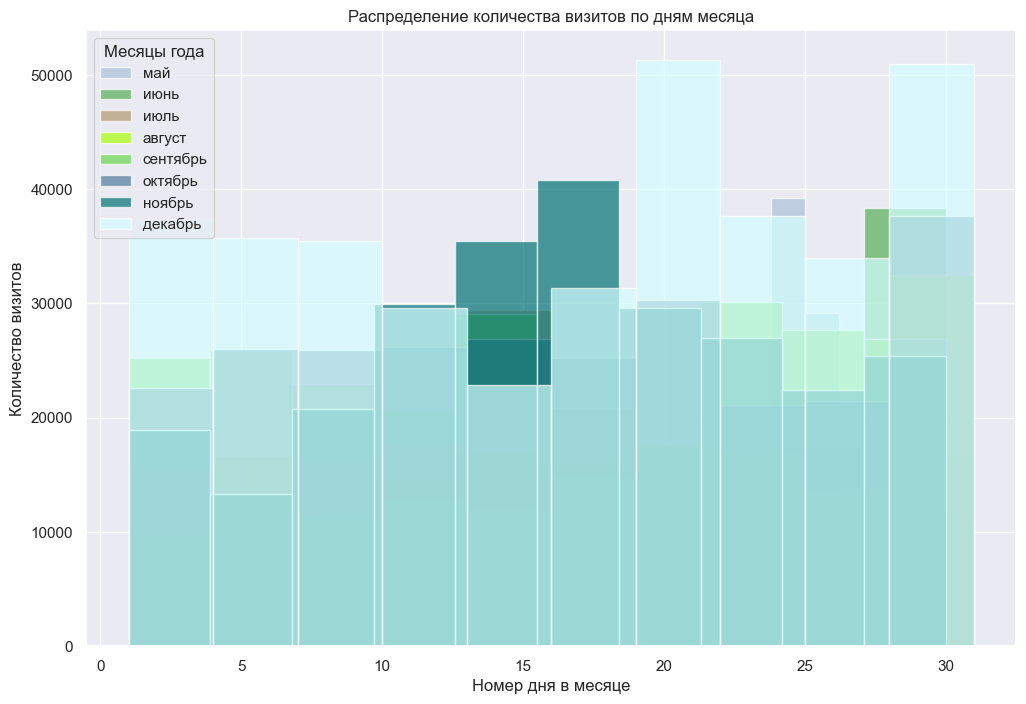

In [18]:
#Построение гистораммы распределения количества визитов по дням месяца
colors_dict = {'май':colors_list[0], #Формирование справочника для определения цвета гистораммы месяца
               'июнь':colors_list[1],
               'июль':colors_list[2],
               'август':colors_list[3], 
               'сентябрь':colors_list[4],
               'октябрь':colors_list[55],
               'ноябрь':colors_list[26],
               'декабрь':colors_list[7]
              }
month_name_dict = {5:'май', #Формирование справочника номеров месяца и соответствующих им наименований
                   6:'июнь',
                   7:'июль',
                   8:'август', 
                   9:'сентябрь',
                   10:'октябрь',
                   11:'ноябрь',
                   12:'декабрь'
                  }
fig, gr = plt.subplots(figsize=(12,8)) #Устанавливаем размер канвы
for month in month_name_dict: #Строим гистограмму для каждого месяца
    gr.hist(df_info_session[df_info_session.visit_month == month].visit_day, color=colors_dict[month_name_dict[month]], alpha=0.7)
plt.xlabel('Номер дня в месяце')
plt.ylabel('Количество визитов')
plt.title('Распределение количества визитов по дням месяца')
plt.legend(colors_dict,title='Месяцы года');

В целом равное распределение по дням, кроме декабря, в котором после 20 декабря интерес к подписке вырос, возможно это связано с получением премий, зарплат и возросшим желанием вложить средства в приобретение автомобиля

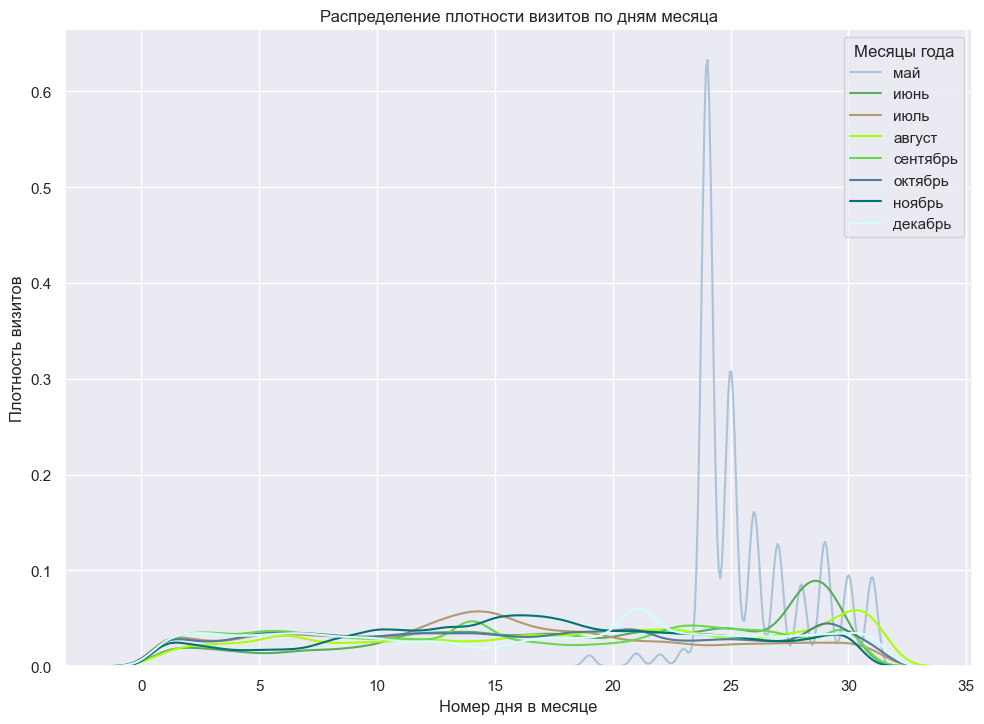

In [5]:
#Построение графиков распределения плотности визитов по дням месяца
sns.set(rc={'figure.figsize':(11.7,8.27)}) #Устанавливаем размер канвы
for month in month_name_dict: #Строим графики плотностей для каждого месяца
    month_set = df_info_session[df_info_session.visit_month == month]
    sns.kdeplot(month_set.visit_day, color=colors_dict[month_name_dict[month]])
plt.xlabel('Номер дня в месяце')
plt.ylabel('Плотность визитов')
plt.title('Распределение плотности визитов по дням месяца')
plt.legend(colors_dict,title='Месяцы года');

В целом распределение плотности визитов по дням, месяц от месяца сильно не отличаются и имеет равнораспределнный характер, за исключением месяца старта проекта (май), в котором резкий скачок плотности связан с тем, что распределние замеряется на отрезке с 24 по 31 мая (остальные крывые растянуты на временном отрезке и не имеет такой явной пилообразной картинки) и повышенным интересом на старте проекта. Но для исключения выбросов необходимо провести дополнительное исследование визитов для мая.

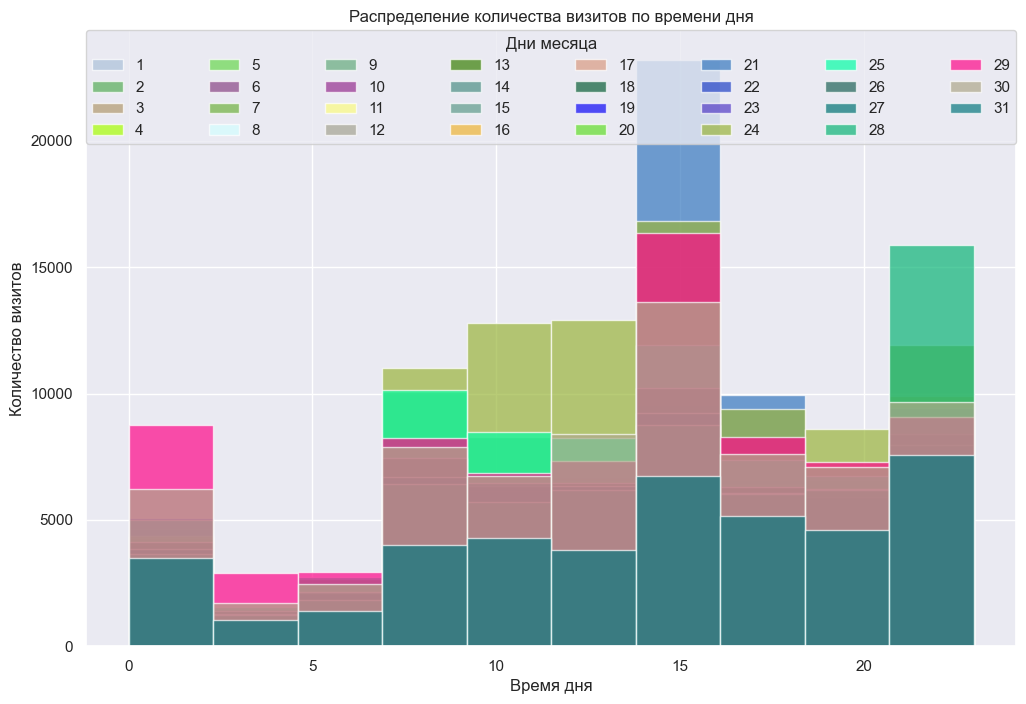

In [10]:
#Построение графиков распределения плотности визитов по часам для каждого дня месяца
colors_dict_2 = {}
for day in range(1,32):
    colors_dict_2[day] = colors_list[day-1] #Формирование справочников цветов для построения гистограмм
fig, gr = plt.subplots(figsize=(12,8))
for day in colors_dict_2:
    gr.hist(df_info_session[df_info_session.visit_day == day].visit_hour, color=colors_dict_2[day], alpha=0.7)
plt.xlabel('Время дня')
plt.ylabel('Количество визитов')
plt.title('Распределение количества визитов по времени дня')
plt.legend(colors_dict_2,title='Дни месяца', loc='upper center', mode='expand', borderaxespad=0, ncol=8);

In [12]:
#Формирование датасета с количеством визитов для каждого дня и часа дня
df_group_for_plot = df_info_session.groupby(['visit_day', 'visit_hour'], as_index=False).aggregate({'client_id':'count'})

In [15]:
#Формирование границ для определения выбросов в количестве визитов
borders_hour = outliers_borders(df_group_for_plot.client_id)

In [16]:
borders_hour

(-814.5, 5223.5)

Text(0, 0.5, 'Плотность визитов')

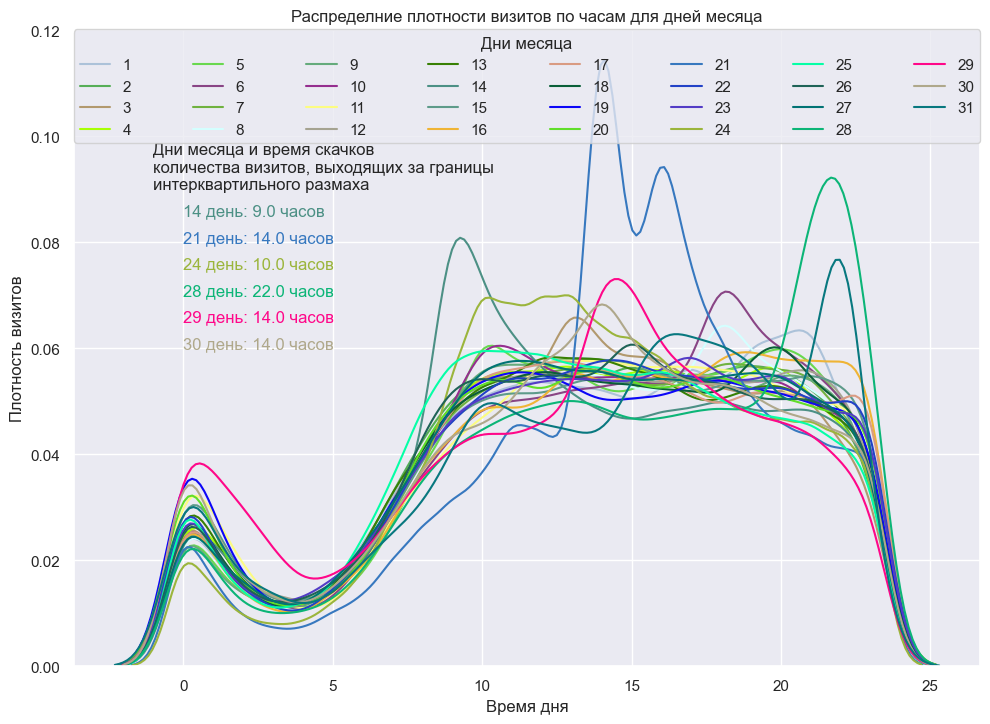

In [17]:
#Построение графиков распределения плотности визитов по часам для каждого дня месяца
cor = 0
problem_day = []
sns.set(rc={'figure.figsize':(11.7,8.27)}) #Устанавливаем размеры канвы
for day in colors_dict_2:
    day_set = df_info_session[df_info_session.visit_day == day]
    sns.kdeplot(day_set.visit_hour, color=colors_dict_2[day]) #Строим график для каждого часа дня
    x = df_group_for_plot.loc[(df_group_for_plot.visit_day == day) & #Определяем час дня с макимальной загрузкой
                      (df_group_for_plot.client_id == df_group_for_plot[df_group_for_plot.visit_day == day].client_id.max()), 
                      'visit_hour'].values[0]
    if df_group_for_plot[df_group_for_plot.visit_day == day].client_id.max() > borders_hour[1]:
        plt.annotate(f"{day} день: {x} часов", (0,0.085-cor), color=colors_dict_2[day]) #Выводим информацию о днях с максимальной загрузкой, выходящей за границы
        problem_day.append((day,x)) #Формирование списка дней для подробного анализа на наличие выбросов
        cor+=0.005
plt.annotate("Дни месяца и время скачков\nколичества визитов, выходящих за границы\nинтерквартильного размаха", (-1,0.09))
plt.legend(colors_dict_2,title='Дни месяца', loc='upper center', mode='expand', borderaxespad=0, ncol=8)
plt.title('Распределние плотности визитов по часам для дней месяца')
plt.xlabel('Время дня')
plt.ylabel('Плотность визитов')

Из графика видно что в целом распределение плотности визитов по часам имеет одинаковый характер для большинства дней, за исключение 6 дней, которые требуют дополнительного анализа. Основные всплески плотности визитов приходится на дневное время с 9 до 22 часов дня. 

Проанализируем значения атрибута 'visit_number', по которому можно оценить количество визитов одного клиента

In [3]:
df_visit = df_info_session.groupby('client_id').aggregate(visit_number = ('visit_number', 'max'))

In [4]:
#Вывод описательной стаитистики для атрибута 'visit_number'
df_visit.visit_number.describe().apply("{0:.5f}".format)

count    1320704.00000
mean           1.37271
std            2.49022
min            1.00000
25%            1.00000
50%            1.00000
75%            1.00000
max          564.00000
Name: visit_number, dtype: object

Text(0, 0.5, 'Частота количества визитов')

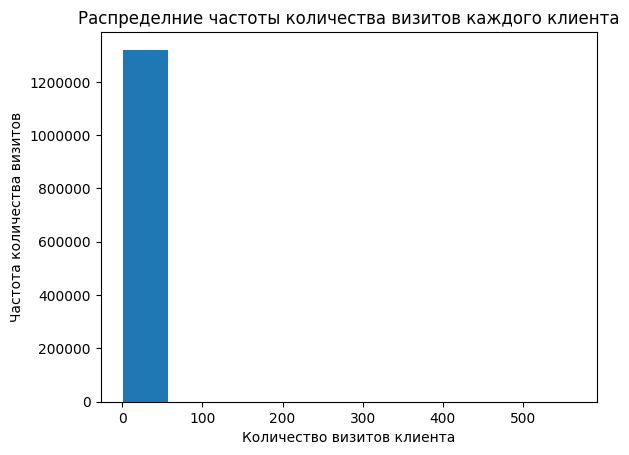

In [13]:
#Построение гистограммы количества визитов клиентов
plt.hist(df_visit)
plt.title('Распределние частоты количества визитов каждого клиента')
plt.ticklabel_format(style='plain')
plt.xlabel('Количество визитов клиента')
plt.ylabel('Частота количества визитов')

Из описательной статистики и гистограммы видно, что присутствуют явные выбросы в количестве визитов. Для определения границ можно использовать межквартильный размах, но использую его мы выйдем на верхней границе к значению 1, по факту всех пользователей с количеством визитов больше 1 необходимо удалить, в реальной ситуации 1 визита для выбора автомобиля может не хватить.

In [31]:
#Формирование описательной статистики для атрибута visit_number датасета, содержащего информацию о сессиях с конверсией
df_info_session[df_info_session.session_id.isin(set_session_action)].visit_number.describe().apply("{0:.5f}".format)

count    50314.00000
mean         4.50908
std         25.97712
min          1.00000
25%          1.00000
50%          1.00000
75%          2.00000
max        562.00000
Name: visit_number, dtype: object

В данном случае верхнюю границу можно сместить до 3.5

In [9]:
df_visit.dtypes

visit_number    int64
dtype: object

In [11]:
borders_visit_number = outliers_borders_max(df_visit.visit_number)

In [12]:
borders_visit_number

8.843368204747417

In [47]:
#Формирование множества клиентов, количество визитов которых выходит за установленные границы количества визитов
set_outlier_client = set(df_info_session[df_info_session.visit_number > borders_visit_number[1]].session_id)

In [48]:
len(set_outlier_client)

147156

In [49]:
#Сформируем датасет с записями, у которых значения атрибута visit_number меньше или равно 3
df_info_session_clean = df_info_session[df_info_session.session_id.isin(set_outlier_client) == False]

Text(0, 0.5, 'Количество визитов')

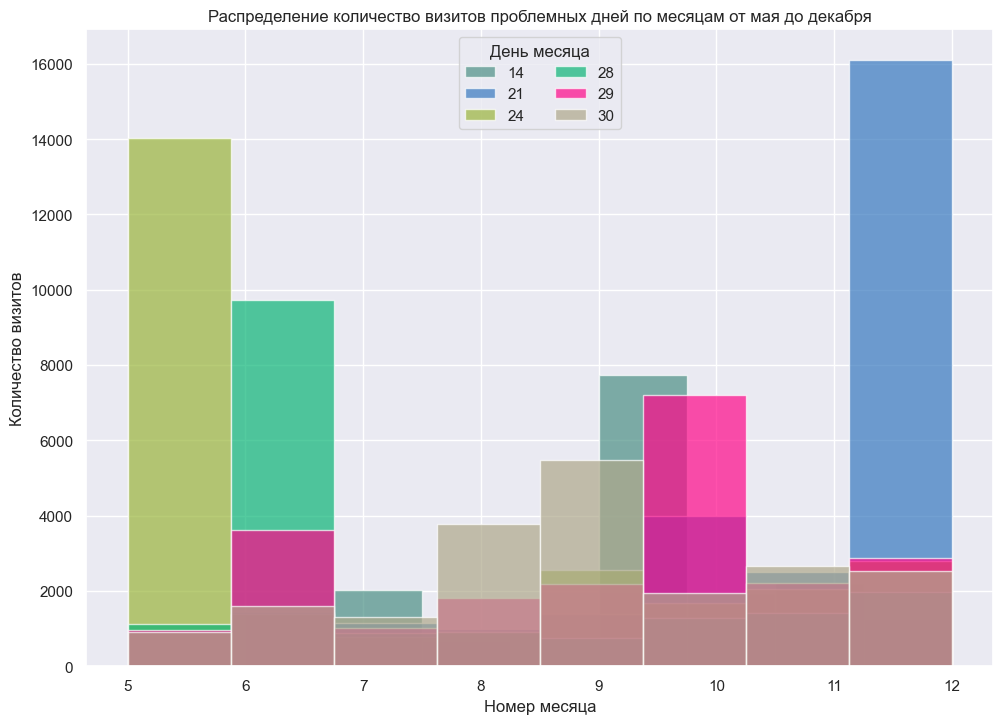

In [19]:
#Построение гистограммы распределения количества визитов проблемных дней по месяцам
legend_dict = {}
for prob in problem_day:
    plt.hist(df_info_session_clean[(df_info_session_clean.visit_day == prob[0]) & #Для каждой гистограммы проблемного дня формируем датасет временем визита входящие в границы +,- 2 от точек максимума
                                   (df_info_session_clean.visit_hour >=prob[1]-2) & 
                                   (df_info_session_clean.visit_hour <=prob[1]+2)].visit_month, 
             bins=8, 
             color=colors_dict_2[prob[0]],
             alpha=0.7)
    legend_dict[prob[0]] = colors_dict_2[prob[0]]
plt.legend(legend_dict,title='День месяца', loc='upper center', ncol=2)
plt.title('Распределение количество визитов проблемных дней по месяцам от мая до декабря')
plt.ticklabel_format(style='plain')
plt.xlabel('Номер месяца')
plt.ylabel('Количество визитов')

В мае 24 всплеск посещений вызван интересом к новому сервису, стартовавшему 24 мая, и возможно с активной маркетинговой кампанией до этого, всплеск 21 числа в декабре возможен из-за активной раскрутки, предновогодних скидок и т.д., а также периода получения зарплат и премий, хотя всплеск досточно большой. остальные всплескы возможно связаны с применением различных тактик меркетинговых кампаний в эти периоды

In [26]:
#Вывод информации о количестве визитов, наиболее популярном значении атрибута utm_medium и количестве самого популярного значения
for day in problem_day:
    df_problem = df_info_session_clean[(df_info_session_clean.visit_day == day[0]) & 
                                       (df_info_session_clean.visit_hour >=day[1]-2) & 
                                       (df_info_session_clean.visit_hour <=day[1]+2)]
    print(f"День {day[0]}, Время визитов c {day[1]-2} по {day[1]+2}\nКоличество визитов {df_problem.shape[0]},\n{df_problem.utm_medium.describe()[['top', 'freq']]}\n")

День 14, Время визитов c 7.0 по 11.0
Количество визитов 17158,
top     email
freq     5627
Name: utm_medium, dtype: object

День 21, Время визитов c 12.0 по 16.0
Количество визитов 27765,
top      push
freq    14603
Name: utm_medium, dtype: object

День 24, Время визитов c 8.0 по 12.0
Количество визитов 26207,
top     (none)
freq     11800
Name: utm_medium, dtype: object

День 28, Время визитов c 20.0 по 24.0
Количество визитов 18046,
top     stories
freq       4858
Name: utm_medium, dtype: object

День 29, Время визитов c 12.0 по 16.0
Количество визитов 21887,
top     email
freq     5659
Name: utm_medium, dtype: object

День 30, Время визитов c 12.0 по 16.0
Количество визитов 20226,
top     banner
freq      5402
Name: utm_medium, dtype: object



По сути органический трафик софрмирован только для 24 мая, старт сервиса, остальные скачки обусловлены действием платного трафика

In [52]:
#Вывод описательной статистики для атрибута visit_time
df_info_session_clean.visit_time.describe()

count      1585110
unique       84839
top       13:00:00
freq         51625
Name: visit_time, dtype: object

In [27]:
#Формирование датасета с данными датасета df_info_session_clean, сгруппированным по значению атрибута visit_time
client_by_hour = df_info_session_clean.groupby('visit_time').aggregate({'client_id':'count'})

In [28]:
#Вывод записей датасета client_by_hour
client_by_hour.sort_values('client_id', ascending=False)

,client_id
visit_time,
13:00:00,51625
12:00:00,51278
10:00:00,51051
14:00:00,50505
11:00:00,50059
...,...
06:54:36,1
04:21:56,1
02:40:23,1


Text(0, 0.5, 'Количество визитов')

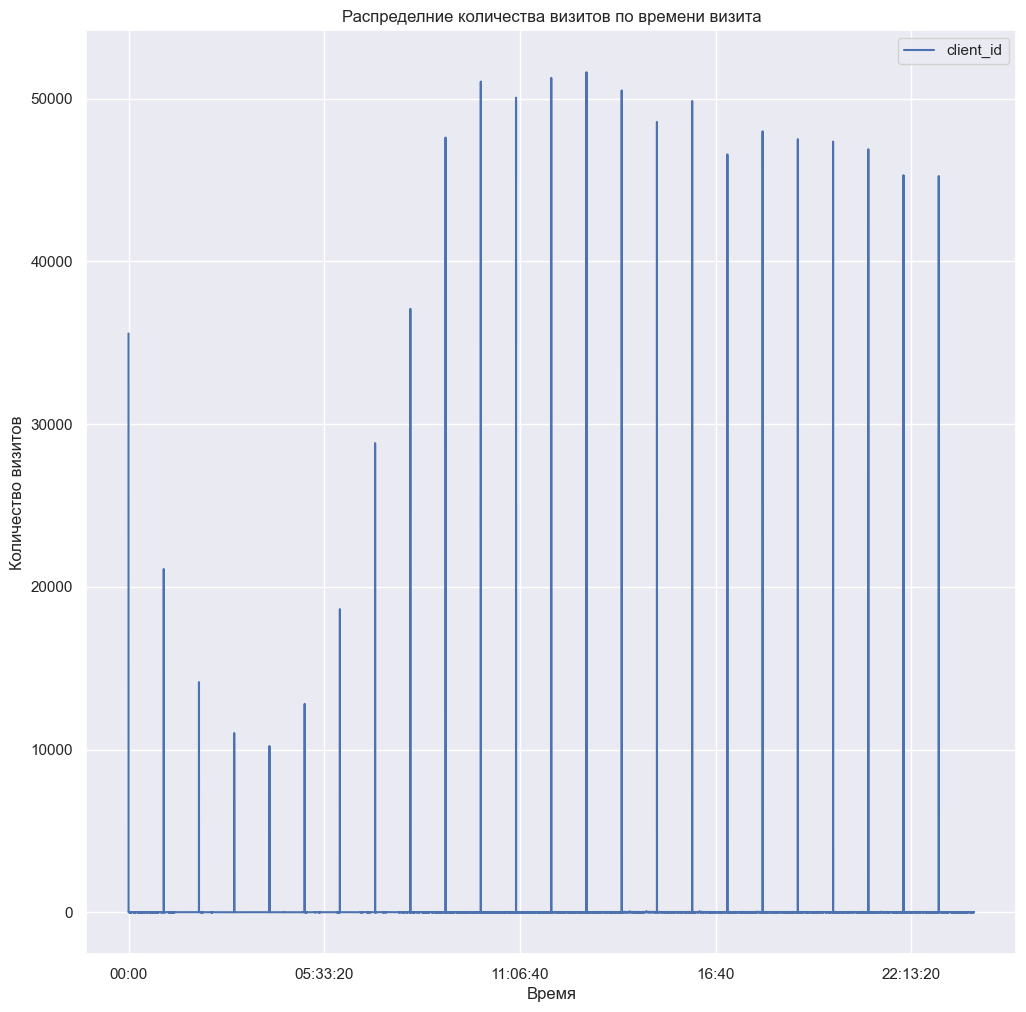

In [30]:
#Сформируем график распределения Количества визитов по временной шкале
client_by_hour.plot(figsize=(12,12))
plt.title('Распределние количества визитов по времени визита')
plt.xlabel('Время')
plt.ylabel('Количество визитов')

In [32]:
#Формирование датасета с визитами время которых соотвествует шаблону, в котором минуты и секунды нулевые, а заданы только часы
set_visit_extra = set()
for hour in range(0,24):
    set_visit_extra = set_visit_extra | set(df_info_session_clean[(df_info_session_clean.visit_time == dt.time(hour, 0, 0))  
                                             ].session_id.unique())

In [33]:
len(set_visit_extra)

916826

In [34]:
#Формирование датасета с данными датасета df_info_session_clean, без записей, попавших в множетсво set_visit_extra,
# и сгруппированным по значению атрибута visit_time
client_by_hour_2 = df_info_session_clean[df_info_session_clean.session_id.isin(set_visit_extra)==False].groupby('visit_time').aggregate({'client_id':'count'})

<AxesSubplot: xlabel='visit_time'>

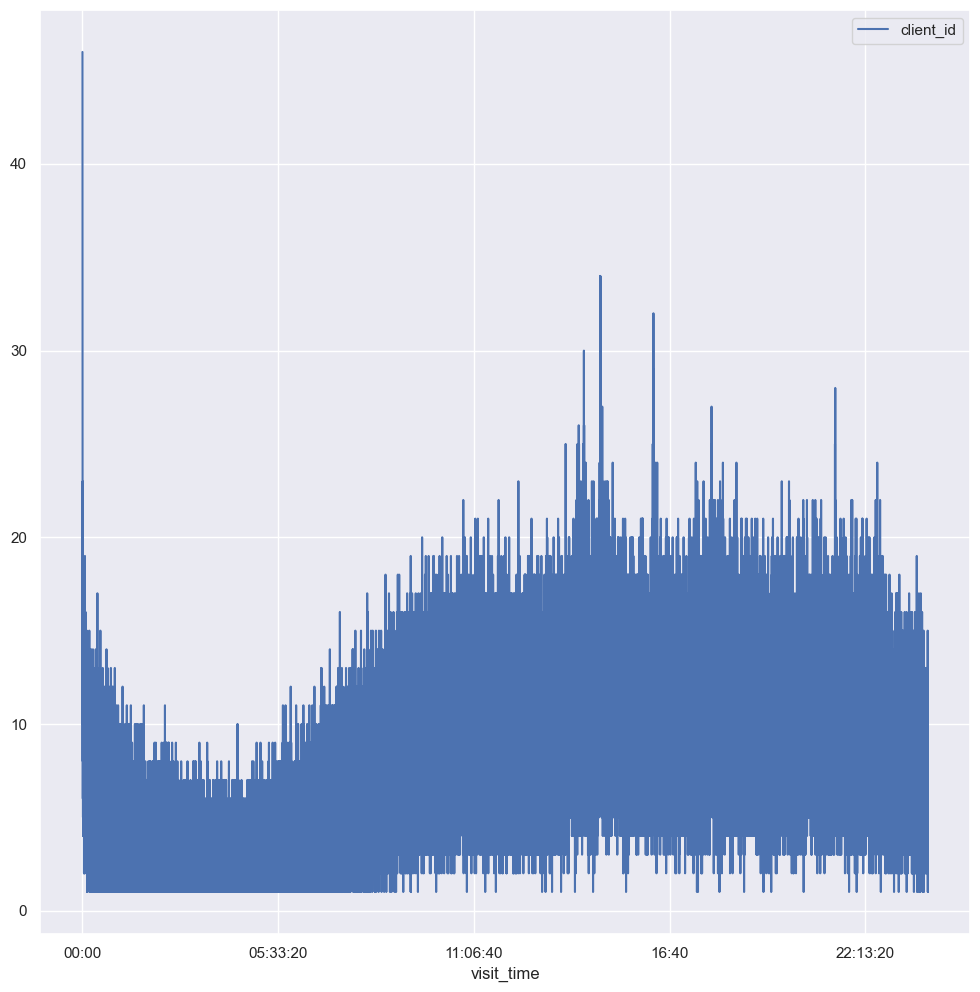

In [65]:
#Сформируем график распределения количества визитов по временной шкале, без визитов с подозрением на выбросы
client_by_hour_2.plot(figsize=(12,12))
plt.title('Распределние количества визитов по времени визита')
plt.xlabel('Время')
plt.ylabel('Количество визитов')

Скачки визитов приходятся на одни и теже временные отсечки, в которых минуты и секунды нулевые, а отличаются только часы. Возможно это связано с раскруткой сервиса

In [43]:
df_info_session_clean[(df_info_session_clean.session_id.isin(set_visit_extra)==True) &
                                         (df_info_session_clean.session_id.isin(set_session_action))]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,...,device_model,device_screen_resolution,device_browser,geo_country,geo_city,device_num_pixel,visit_datetime,visit_month,visit_day,visit_hour
71,9055768928391199041.1623652678.1623652678,2108460508.1623652673,2021-06-14,09:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,...,NaN,360x780,Chrome,Russia,Moscow,280800,2021-06-14 09:00:00,6.0,14.0,9.0
78,9055794766915104430.1624305327.1624305327,2108466524.1624305326,2021-06-21,22:00:00,1,BHcvLfOaCWvWTykYqHVe,cpc,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,...,NaN,834x1112,Safari,Russia,Domodedovo,927408,2021-06-21 22:00:00,6.0,21.0,22.0
132,9056028189803556573.1630154471.1630154471,2108520872.1630154461,2021-08-28,15:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,...,NaN,412x915,YaBrowser,Russia,Krasnodar,376980,2021-08-28 15:00:00,8.0,28.0,15.0
142,9056093322981390023.1628944098.1628944098,2108536037.1628944071,2021-08-14,15:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,...,NaN,360x740,Chrome,Russia,Moscow,266400,2021-08-14 15:00:00,8.0,14.0,15.0
256,9056607924483613657.1624597468.1624597468,2108655852.1624597465,2021-06-25,08:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,MXqmDyetMTICSSitTjWV,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,...,NaN,412x915,YaBrowser,Russia,Balashikha,376980,2021-06-25 08:00:00,6.0,25.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859914,9054894249716207400.1628426024.1628426024,2108256856.1628426024,2021-08-08,15:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,...,NaN,375x812,Safari,Russia,Samara,304500,2021-08-08 15:00:00,8.0,8.0,15.0
1860000,9055248417020050011.1634073188.1634073188,2108339317.1634073179,2021-10-13,00:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,SgIUDYUKnyWHVowUOqid,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,...,NaN,360x780,Chrome,Russia,Nizhny Novgorod,280800,2021-10-13 00:00:00,10.0,13.0,0.0
1860002,9055248417020050011.1634075541.1634075541,2108339317.1634073179,2021-10-13,00:00:00,3,ZpYIoDJMcFzVoPFsHGJL,banner,SgIUDYUKnyWHVowUOqid,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,...,NaN,360x780,Chrome,Russia,Nizhny Novgorod,280800,2021-10-13 00:00:00,10.0,13.0,0.0
1860029,9055376699099939975.1630766214.1630766214,2108369185.1630766215,2021-09-04,17:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,...,NaN,1920x1080,Chrome,Russia,Khimki,2073600,2021-09-04 17:00:00,9.0,4.0,17.0


Большее количество конверсионных визитов приходится на визиты с признаками раскрутки, в связи с этим, оставим все визиты

## Feature engineering

### Дата сет df_hit

В процессе очистки данных датасета df_hit был добавлен новый атрибут hit_time_coef.

In [15]:
df_hit_clean['event_value'] = np.where(df_hit_clean['event_action'].isin(target_action) == False, 0,1)

In [126]:
df_hit_clean = pd.read_pickle('data/df_hit_clean.pkl')

In [12]:
df_hit_clean['model'] = df_hit_clean.hit_page_path.apply(lambda x: model(x))

In [13]:
list_model = df_hit_clean[df_hit_clean.model.notna()].model.unique()

In [14]:
len(list_model)

390

In [15]:
df_hit_clean.loc[df_hit_clean.model == 'https:'] = np.nan

In [16]:
df_hit_clean.loc[df_hit_clean.model == 'lada_(vaz)'] = 'lada-vaz'

In [17]:
list_model = df_hit_clean[df_hit_clean.model.notna()].model.unique()

In [18]:
len(list_model)

389

In [20]:
df_hit_ready_add = df_hit_clean.groupby('session_id',as_index=False).aggregate(hit_referer = ('hit_referer',lambda x: x.unique()[0]),
                                                                               hit_time_max = ('hit_time','max'),
                                                                               hit_number_max = ('hit_number','max'),
                                                                               hit_time_coef_mean = ('hit_time_coef','mean'),
                                                                               model_count = ('model',pd.Series.nunique),
                                                                               model = ('model',lambda x: x.unique()[0]),
                                                                               event_value = ('event_value','max')
                                                                              )

In [ ]:
df_hit_ready_add['model'] = df_hit_ready_add.model.fillna('(none)')

In [24]:
df_hit_ready_add

,session_id,hit_referer,hit_time_max,hit_number_max,hit_time_coef_mean,model_count,model,event_value
0,1000009318903347362.1632663668.1632663668,HbolMJUevblAbkHClEQa,132654.937673,15.0,8186.684066,0,(none),0.0
1,1000010177899156286.1635013443.1635013443,HbolMJUevblAbkHClEQa,238700.000000,12.0,13982.075217,0,(none),0.0
2,1000013386240115915.1635402956.1635402956,HbolMJUevblAbkHClEQa,170755.000000,17.0,8202.097357,1,lada-vaz vesta,0.0
3,1000017303238376207.1623489300.1623489300,HbolMJUevblAbkHClEQa,166311.266687,18.0,8332.423034,0,(none),0.0
4,1000027718532820202.1622240490.1622240490,HbolMJUevblAbkHClEQa,5481.868287,3.0,1827.289429,0,(none),0.0
...,...,...,...,...,...,...,...,...
1732024,999960188766601545.1626816843.1626816843,HbolMJUevblAbkHClEQa,5481.868287,3.0,1827.289429,0,(none),0.0
1732025,99996598443387715.1626811203.1626811203,HbolMJUevblAbkHClEQa,31083.762902,4.0,4799.115077,0,(none),0.0
1732026,999966717128502952.1638428330.1638428330,HbolMJUevblAbkHClEQa,113802.000000,19.0,6026.540550,0,(none),0.0
1732027,999988617151873171.1623556243.1623556243,HbolMJUevblAbkHClEQa,67308.286186,8.0,6333.980840,0,(none),0.0


In [95]:
df_hit_ready_add = pd.read_pickle('data/df_hit_ready_add')

### Дата сет df_session

In [4]:
df_session = pd.read_pickle('data/df_info_session_clean.pkl')

In [5]:
df_session

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,...,device_model,device_screen_resolution,device_browser,geo_country,geo_city,device_num_pixel,visit_datetime,visit_month,visit_day,visit_hour
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,...,NaN,360x720,Chrome,Russia,Zlatoust,259200,2021-11-24 14:36:32,11.0,24.0,14.0
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,...,NaN,385x854,Samsung Internet,Russia,Moscow,328790,2021-11-14 08:21:30,11.0,14.0,8.0
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,...,NaN,360x720,Chrome,Russia,Krasnoyarsk,259200,2021-12-28 02:42:06,12.0,28.0,2.0
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,LEoPHuyFvzoNfnzGgfcd,NOBKLgtuvqYWkXQHeYWM,puhZPIYqKXeFPaUviSjo,...,NaN,393x786,Chrome,Russia,Moscow,308898,2021-05-29 05:00:00,5.0,29.0,5.0
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,...,NaN,393x786,Chrome,Russia,Moscow,308898,2021-05-29 05:00:00,5.0,29.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860037,9055415581448263752.1640159305.1640159305,2108378238.1640159304,2021-12-22,10:48:25,1,BHcvLfOaCWvWTykYqHVe,cpc,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,VlqBmecIOXWjCWUmQkLd,...,NaN,1920x1080,Chrome,Russia,Moscow,2073600,2021-12-22 10:48:25,12.0,22.0,10.0
1860038,9055421130527858185.1622007305.1622007305,2108379530.1622007305,2021-05-26,08:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,...,NaN,390x844,Safari,Russia,Stavropol,329160,2021-05-26 08:00:00,5.0,26.0,8.0
1860039,9055422955903931195.1636979515.1636979515,2108379955.1636979515,2021-11-15,15:31:55,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,...,NaN,375x667,Safari,Russia,Moscow,250125,2021-11-15 15:31:55,11.0,15.0,15.0
1860040,905543020766873816.1638189404.1638189404,210838164.1638189272,2021-11-29,15:36:44,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,...,NaN,393x851,Chrome,Russia,Chelyabinsk,334443,2021-11-29 15:36:44,11.0,29.0,15.0


Добавим новый признак разница между сеансами клианта. Сначала сгруппируем данные по признаку 'client_id' и вычислим количество визитов. Для клиентов с одним визитом установим для признака 'time_diff' значение 0.0. Для остальных клиентов вычислим значение нового признака.

In [33]:
df_session_gr = df_session.groupby(['client_id'], as_index=False).agg(number_session = ('session_id', 'count'))

In [82]:
df_session_gr

,client_id,number_session
0,1000000719.1634385152,1
1,10000026.1621927845,2
2,1000002812.1632654122,3
3,1000004514.1631015304,1
4,1000005466.1623263709,1
...,...,...
1318143,999992136.1640123560,1
1318144,999992480.1626355201,2
1318145,999993469.1624255512,1
1318146,999995462.1631174885,1


In [41]:
set_client_id = set (df_session_gr[df_session_gr.number_session == 1].client_id.unique())

In [49]:
df_session['time_diff'] = np.where(df_session['client_id'].isin(set_client_id), 0,np.nan)

In [90]:
for client in df_session[df_session.time_diff.isna()].client_id.unique():
    df_session.loc[df_session[df_session.client_id == client].index, 'time_diff'] = df_session[df_session.client_id == client].visit_datetime.diff().astype('timedelta64[h]')

Для оставшихся пустых значений установим значение 0.0

In [91]:
df_session['time_diff'] = df_session.time_diff.fillna(0.0)

In [106]:
df_session.loc[df_session_add[df_session_add.time_diff < 0].index, 'time_diff'].unique()

array([-1.])

In [107]:
df_session.loc[df_session_add[df_session_add.time_diff < 0].index, 'time_diff'] = 1.0

Добавим признак с названием дня недели совершения визита

In [116]:
df_session.loc[:,'day_name'] = df_session.loc[:,'visit_datetime'].apply(lambda x: x.day_name())

Подготовим датафрейм для объединения с датасетом с информацией о событиях во время визитов

In [117]:
df_session_add = df_session[['session_id', 'visit_number', 'utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent', 'utm_keyword', 'device_category', 'device_os', 'device_num_pixel', 'device_browser', 'geo_country', 'geo_city', 'visit_month', 'visit_day', 'visit_hour', 'time_diff', 'day_name']]

In [118]:
df_session_add.to_pickle('data/df_session_add.pkl')

In [119]:
df_ready = df_hit_ready_add.merge(df_session_add, on='session_id', how="inner")

In [120]:
df_ready.to_pickle('data/df_ready.pkl')

## Моделирование